# This notebooks will help you evaluate the calibration of your thermal limits

In this notebook, you will first load the generated flow and overload data from the initial grid environment. 

You will then be able to create different dataviz that could help you in your analysis, to either calibrate thermal limits or study the level of difficulty of the environment.


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#This-notebooks-will-help-you-evaluate-the-calibration-of-your-thermal-limits" data-toc-modified-id="This-notebooks-will-help-you-evaluate-the-calibration-of-your-thermal-limits-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>This notebooks will help you evaluate the calibration of your thermal limits</a></span><ul class="toc-item"><li><span><a href="#Config-parameters-for-data-generation" data-toc-modified-id="Config-parameters-for-data-generation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Config parameters for data generation</a></span></li><li><span><a href="#Load-the-environment" data-toc-modified-id="Load-the-environment-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load the environment</a></span></li><li><span><a href="#Load-the-generated-data" data-toc-modified-id="Load-the-generated-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load the generated data</a></span><ul class="toc-item"><li><span><a href="#Load-Flow-Data" data-toc-modified-id="Load-Flow-Data-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Load Flow Data</a></span></li><li><span><a href="#Energy-mix-et-nombres-scénarios-par-moi" data-toc-modified-id="Energy-mix-et-nombres-scénarios-par-moi-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Energy mix et nombres scénarios par moi</a></span></li><li><span><a href="#Load-Thermal-Limits" data-toc-modified-id="Load-Thermal-Limits-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Load Thermal Limits</a></span></li><li><span><a href="#Load-or-generate-specific-dataframe-on-overloads-based-on-flow-results" data-toc-modified-id="Load-or-generate-specific-dataframe-on-overloads-based-on-flow-results-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Load or generate specific dataframe on overloads based on flow results</a></span><ul class="toc-item"><li><span><a href="#if-does-not-exist,-generate-it-here.-Otherwise-just-load-it-and-skip-this" data-toc-modified-id="if-does-not-exist,-generate-it-here.-Otherwise-just-load-it-and-skip-this-1.3.4.1"><span class="toc-item-num">1.3.4.1&nbsp;&nbsp;</span>if does not exist, generate it here. Otherwise just load it and skip this</a></span></li><li><span><a href="#Load-it" data-toc-modified-id="Load-it-1.3.4.2"><span class="toc-item-num">1.3.4.2&nbsp;&nbsp;</span>Load it</a></span></li><li><span><a href="#Display-it" data-toc-modified-id="Display-it-1.3.4.3"><span class="toc-item-num">1.3.4.3&nbsp;&nbsp;</span>Display it</a></span></li></ul></li><li><span><a href="#Additional-raw-overload-dataframe-(for-each-independant-timesteps)" data-toc-modified-id="Additional-raw-overload-dataframe-(for-each-independant-timesteps)-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Additional raw overload dataframe (for each independant timesteps)</a></span></li></ul></li></ul></li><li><span><a href="#Define-sensibility" data-toc-modified-id="Define-sensibility-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Define sensibility</a></span><ul class="toc-item"><li><span><a href="#Analysis-for-evaluation" data-toc-modified-id="Analysis-for-evaluation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Analysis for evaluation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#For-all-overloads" data-toc-modified-id="For-all-overloads-2.1.0.1"><span class="toc-item-num">2.1.0.1&nbsp;&nbsp;</span>For all overloads</a></span></li></ul></li><li><span><a href="#Plot-overload-depth-moustache-plot-for-each-line" data-toc-modified-id="Plot-overload-depth-moustache-plot-for-each-line-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Plot overload depth moustache plot for each line</a></span><ul class="toc-item"><li><span><a href="#Depth" data-toc-modified-id="Depth-2.1.1.1"><span class="toc-item-num">2.1.1.1&nbsp;&nbsp;</span>Depth</a></span></li><li><span><a href="#Duration" data-toc-modified-id="Duration-2.1.1.2"><span class="toc-item-num">2.1.1.2&nbsp;&nbsp;</span>Duration</a></span></li></ul></li><li><span><a href="#Density-plot-of-overload-depth-vs-duration" data-toc-modified-id="Density-plot-of-overload-depth-vs-duration-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Density plot of overload depth vs duration</a></span></li><li><span><a href="#Look-at-overload-per-month---day-of-week---hour" data-toc-modified-id="Look-at-overload-per-month---day-of-week---hour-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Look at overload per month - day of week - hour</a></span></li><li><span><a href="#Plots-of-occurence-of-interesting-overload-by-lines" data-toc-modified-id="Plots-of-occurence-of-interesting-overload-by-lines-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Plots of occurence of interesting overload by lines</a></span><ul class="toc-item"><li><span><a href="#For-interesting-overloads" data-toc-modified-id="For-interesting-overloads-2.1.4.1"><span class="toc-item-num">2.1.4.1&nbsp;&nbsp;</span>For interesting overloads</a></span></li><li><span><a href="#For-hard-overloads" data-toc-modified-id="For-hard-overloads-2.1.4.2"><span class="toc-item-num">2.1.4.2&nbsp;&nbsp;</span>For hard overloads</a></span></li></ul></li><li><span><a href="#Summary-dataframe-of-worst-overload-for-given-agent-and-scenario" data-toc-modified-id="Summary-dataframe-of-worst-overload-for-given-agent-and-scenario-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Summary dataframe of worst overload for given agent and scenario</a></span></li><li><span><a href="#Chronics-plot-in-scenario-around-an-overload-of-interest" data-toc-modified-id="Chronics-plot-in-scenario-around-an-overload-of-interest-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Chronics plot in scenario around an overload of interest</a></span></li></ul></li></ul></li><li><span><a href="#Best-agent" data-toc-modified-id="Best-agent-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Best agent</a></span></li></ul></div>

In [1]:
import os
import re
import numpy as np
import pandas as pd
import fastparquet
import grid2op
import cufflinks as cf
from grid2op.PlotGrid import PlotMatplot
from grid2op.Parameters import Parameters
from grid2op.Chronics import Multifolder, GridStateFromFileWithForecasts
from lightsim2grid import LightSimBackend
from tqdm.notebook import tqdm
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#from grid2op.PlotGrid import PlotMatplot
from grid2op.PlotGrid import NUKE_COLOR, THERMAL_COLOR, HYDRO_COLOR, SOLAR_COLOR, WIND_COLOR
import matplotlib.pyplot as matplt
import seaborn as sns
%matplotlib inline

#from itables import init_notebook_mode
#init_notebook_mode(all_interactive=True)

import ipywidgets as widgets
from ipywidgets import Layout

import warnings
warnings.filterwarnings('ignore')

## Config parameters for data generation

In [2]:
# This cell is tagged as `parameters`
# can be used with papermill for parametrized notebook execution in cli
env_mix_name = None                              # "l2rpn_idf_2023_v4"#"l2rpn_neurips_2020_track2_x1"
env_name_calibration = "l2rpn_idf_2023_v4_20pc"                      # none is same as env_name_evaluation. but could be another energy mix
env_name_evaluation  = "l2rpn_idf_2023_v4_30pc"  # "l2rpn_neurips_2020_track2_small"#'l2rpn_idf_2023_v0'
env_root_folder = os.path.realpath("..//..")
grid2op_data_folder = "C:\\Users\\dejaegherjer\\data_grid2op"


is_calibrated_env=False                        # in case the grid2op env already existed with its calibration, so you did not do the calibration yourself and just jumped to the evaluation
manual_scenario_viz = False                    # To visualize a specific scenario (manually). Better to run these widgets manually. 

action_file_name="l2rpn_wcci_actions.json"     # path of file with unitary action agents to run
only_do_nothing_agent=False                    # if you only want to run do nothing agent, and not other unitary action agents


v_calibration="v4"

input_folder=None                              # where to load some data from. If none this is is the same as the output folder
output_folder="Outputs"                        # where to save generated dataframes
output_file_flow_light="FlowDataset.parquet" # in case it was not computed in calibration for this env

# Dans environnement évaluation
input_file_flow="FlowDataset.parquet"       # FlowDataset.file in case it is from an already calibrated env, or from an env different from the one used for calibration 
input_file_ov="Overloads_info_Best_Agent.file"

# Dans environnement de calibration :
input_file_th="new_thermal_limits.csv"
recalibrate_th_limits = False


#########
#Threshold for analysis
#to identify lines that are often overloaded
threshold_high_weekly_occurence=1.5            # frequency per week#260 scenarios over a week
                                               # to identify lines that are more rarely overloaded below this threshold
threshold_low_weekly_occurence=0.5             # frequency per week#260 scenarios over a week

threshold_interesting_overload_duration=10     # 10 time steps about 1 hour: this starts to be an interesting overload that lasts
#this is a harder overload which last in time, and will induce more interdepencies in decisions. 
#It might get difficult in the overload maximum depth is servere. But otherwise it should be manageable
threshold_hard_overload_duration=25 

if(env_mix_name):
    print("we are analyzing env "+env_name_evaluation+" in mix "+env_mix_name)
else:
    print("we are analyzing env "+env_name_evaluation)


we are analyzing env l2rpn_idf_2023_v4_30pc


In [3]:
###
#setting input and output folder paths
output_folder_v_evaluation=f"{output_folder}/{env_name_evaluation}/{v_calibration}"

os.makedirs(output_folder, exist_ok=True)

if env_name_calibration is None:
    env_name_calibration=env_name_evaluation

input_folder_v_calibration=f"{output_folder}/{env_name_calibration}/{v_calibration}"
if input_folder is not None:
    input_folder_v_calibration=f"{input_folder}/{env_name_calibration}/{v_calibration}"

if not os.path.exists(output_folder_v_evaluation):
    os.makedirs(output_folder_v_evaluation)

#check that inputs exist in case the evaluation is not done from a existing calibrated grid2op env
input_file_th_path = os.path.join(input_folder_v_calibration,input_file_th)

input_file_flow_path= os.path.join(input_folder_v_calibration, input_file_flow)
input_file_ov_path  = os.path.join(input_folder_v_calibration, input_file_ov)

if not os.path.exists(input_file_flow_path):
    if(env_name_calibration==env_name_evaluation) and not is_calibrated_env:
        print("have you generated FlowDataset with best agent ? it cannont be found in "+input_file_flow_path)
        print("you might want to run previous notebook")
    else:
        print("have you generated FlowDataset ? it cannont be found in "+input_file_flow_path)
        print("you might want to run the very first notebook")
    raise
    
if not os.path.exists(input_file_th_path) and not is_calibrated_env:
    print("have you generated Thermal Limits ? it cannont be found in "+input_file_th_path)
    print("you might want to run previous notebook")
    raise
elif os.path.exists(input_file_th_path) and not is_calibrated_env:
    # in the case it has been calibrated from another energy mix for instance
    # TO DO
    # copy the file thermal limits in the output folder for calibration to keep track of it ?
    # ideally should track that it was from another mix. 
    pass
    
if not os.path.exists(input_file_ov_path) and not is_calibrated_env and env_name_calibration==env_name_evaluation:
    print("have you generated Overload dataframe ? it cannont be found in "+input_file_ov_path)
    print("you might want to run previous notebook in case you missed one step")
    print("yet this data can be generated below")
    

## Load the environment

In [5]:
if env_mix_name:  
    path_chronix = f"{env_root_folder}/{env_name_evaluation}/{env_mix_name}/chronics/"#f"../generation_donnees/{env_name}/chronics/"
else:
    path_chronix = f"{env_root_folder}/{env_name_evaluation}/chronics/"
path_env = os.path.join(grid2op_data_folder, env_name_evaluation) #f"../generation_donnees/{env_name}"

In [6]:
params = Parameters()
params.NO_OVERFLOW_DISCONNECTION = True
if (env_mix_name):
    env_ref = grid2op.make(path_env,
                       chronics_path=path_chronix,
                       param=params,
                       backend=LightSimBackend(),
                       chronics_class=Multifolder,
                       data_feeding_kwargs={"gridvalueClass": GridStateFromFileWithForecasts}
                       )
    env_ref_ = env_ref[env_mix_name]
else:
    env_ref=grid2op.make(path_env,
                       chronics_path=path_chronix,
                       param=params,
                       backend=LightSimBackend(),
                       data_feeding_kwargs={"gridvalueClass": GridStateFromFileWithForecasts}
                        )
    env_ref_=env_ref
#obs = env.reset()

In [7]:
LINE_NAMES=env_ref_.name_line

## Load the generated data

### Load Flow Data

In [8]:

file_flow_Format="feather"#"parquet" #"feather"
if(".parq" in input_file_flow_path):
    file_flow_Format="parquet"

if(os.path.isfile(input_file_flow_path)):
    print("this file already exist: "+input_file_flow_path)
    if (file_flow_Format=="parquet"):
        df_analysis=pd.read_parquet(input_file_flow_path, engine = 'fastparquet')
    else:
        df_analysis=pd.read_feather(input_file_flow_path)
else:
    print("this file does not exist : " + input_file_flow_path)
    print("maybe look for the other format or run data generation notebook first for this environment "+env_name)
    raise

df_analysis.head()

this file already exist: Outputs/l2rpn_idf_2023_v4_30pc/v0\FlowDataset.parquet


OSError: [Errno 22] Invalid argument

In [ ]:
print(df_analysis.shape)
df_analysis.info()

(16069334, 203)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16069334 entries, 0 to 16069333
Columns: 203 entries, 0_1_0 to action_before_start
dtypes: datetime64[ns](1), float32(195), int32(5), object(2)
memory usage: 12.3+ GB


In [ ]:
if "action_before_start" in df_analysis.columns:
    df_analysis.rename(columns={'action_before_start':'agent'}, inplace=True)
    i_do_nothing = df_analysis.loc[
            (df_analysis["agent"]=="do_nothing"), LINE_NAMES
    ]
    print(i_do_nothing.shape)
#df_analysis["agent"]=df_analysis["agent"].astype("category")
    
if only_do_nothing_agent and ("agent" in df_analysis.columns):
    df_analysis=df_analysis[df_analysis.agent=="do_nothing"]
    df_analysis.reset_index(drop=True,inplace=True)

(524680, 186)


### Energy mix et nombres scénarios par moi

<Axes: >

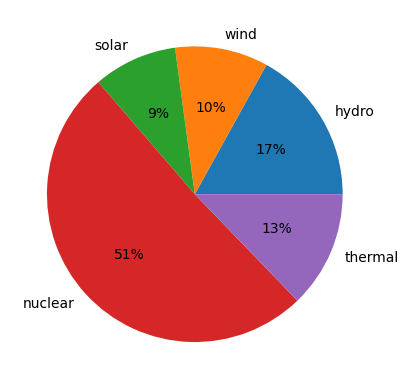

In [ ]:
mix_df=df_analysis[["hydro","wind","solar","nuclear","thermal"]].astype("float32").sum()
mix_df.plot.pie(autopct='%1.0f%%')

In [ ]:
nb_scenarios=len(df_analysis["scenario"].unique())
nb_scenarios

260

Text(0.5, 1.0, 'nb timesteps of scenarios per month')

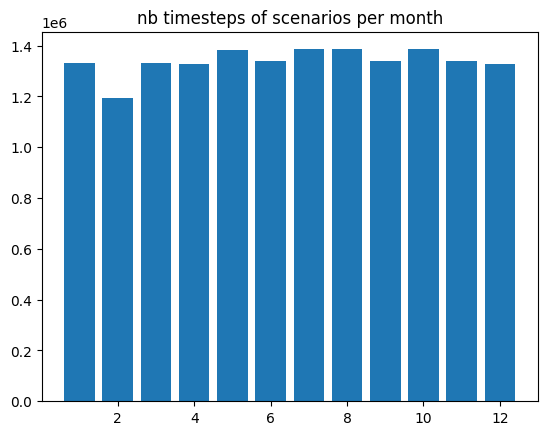

In [ ]:
months, nb_m = np.unique(df_analysis[["month"]].values, return_counts=True)
matplt.bar(months, height = nb_m)
matplt.title("nb timesteps of scenarios per month")

### Load Thermal Limits


In [ ]:
if is_calibrated_env:
    thermal_limits=env_ref._thermal_limit_a
    print(f"is_calibrated_env = {is_calibrated_env}")
#if os.path.exists(input_file_th_path):
else:
    thermal_limits=pd.read_csv(input_file_th_path,index_col=0)
    assert np.all( [name_1==name_2 for (name_1, name_2) in zip(LINE_NAMES, thermal_limits.columns)] )
    thermal_limits=thermal_limits.iloc[0].values
#thermal_limits.loc[0].values
thermal_limits

array([ 349.,  546., 1151.,  581.,  743.,  613.,   69.,  801.,  731.,
        953.,  463.,  291.,  876.,  649.,  461.,  916.,  281.,  204.,
         97.,  251., 1901., 1356.,  601.,  793.,  351.,  509.,  409.,
        566.,  339.,  899.,  356.,  673.,  543., 1313.,  411.,  551.,
        633.,  244.,  589.,  285.,  646.,  418.,  479.,  327., 1043.,
        951.,  429.,  871.,  449., 1056.,  939.,  946.,  759.,  716.,
        629.,  486.,  409.,  296.,  893.,  411.,   99.,  326.,  506.,
        993.,  646.,  257.,  493.,  263.,  323.,  513.,  629.,  566.,
       1379.,  659., 3566.,  423.,  306.,  479.,  279.,  376.,  336.,
        836.,  759.,  151., 1143.,  851.,  236.,  846.,  397.,  483.,
        559.,  216.,  219.,  130., 1533., 1733.,  916., 1071.,  513.,
        289.,  796.,  773.,  849.,  359.,  566.,  273.,  252., 1119.,
        535.,  581.,   83.,  353.,  541.,  316., 1033.,  379.,  316.,
       1221.,  599.,  313.,  371.,  301.,  346.,  449.,  571.,  169.,
        273.,   88.,

### Load or generate specific dataframe on overloads based on flow results 


In [ ]:
overload_df_exist=os.path.isfile(input_file_ov_path)
#overload_df_exist=False

#### if does not exist, generate it here. Otherwise just load it and skip this

##### best agent df_analysis 
Given that we know the number overload at each timesteps, for each agent, we will take the best of all agents at each time step to identify what could have been the best configuration with least overloads. The result will be a "best_agent". We can then only keep the "do_nothing" agent and "best_agent" for a more straightforward analysis


In [ ]:
from utils.Overload import get_simple_overload_df

if not overload_df_exist:
    indicesLineOverloaded=[i  for i,l in enumerate(LINE_NAMES) if (df_analysis[l]>=thermal_limits[i]).sum()>=1]
    Overloads_df=get_simple_overload_df(df_analysis,LINE_NAMES,indicesLineOverloaded,thermal_limits)
    Overloads_df.max_depth=Overloads_df.max_depth.astype("float32") #because sort values does not deal with float16


computing for line 68_76_12
computing for line 77_78_16
computing for line 76_79_17
computing for line 76_79_18
computing for line 78_79_19
computing for line 91_92_37
computing for line 92_93_39
computing for line 79_95_41
computing for line 93_95_43
computing for line 79_97_45
computing for line 79_98_47
computing for line 97_99_52
computing for line 98_99_53
computing for line 11_13_57
computing for line 102_103_60
computing for line 31_112_75
computing for line 11_15_83
computing for line 15_16_86
computing for line 17_18_88
computing for line 21_22_93
computing for line 30_31_105
computing for line 26_31_106
computing for line 34_35_110
computing for line 34_36_111
computing for line 33_35_113
computing for line 43_44_125
computing for line 44_45_126
computing for line 45_46_127
computing for line 45_47_128
computing for line 44_48_133
computing for line 48_49_135
computing for line 48_50_136
computing for line 48_53_141
computing for line 48_53_142
computing for line 53_54_143
co

In [ ]:

if not overload_df_exist:
    best_df=Overloads_df.sort_values(['nb_total','max_depth'], ascending=True).drop_duplicates(['scenario','datetimes'])
    #ascending=[True, False]
    df_analysis_light=df_analysis.loc[best_df.index,:]
    df_analysis_light["agent"]="best_agent"

    #df_analysis_light=df_analysis_light.append(df_analysis[df_analysis.agent=="do_nothing"]).reset_index(drop=True)
    df_analysis_light=pd.concat([df_analysis_light,df_analysis[df_analysis.agent=="do_nothing"]],ignore_index=True)
    df_analysis_light=df_analysis_light.sort_values(['agent','scenario','datetimes'], ascending=True,ignore_index=True)

    df_analysis_light_file_path=os.path.join(output_folder_v_evaluation,output_file_flow_light)
    df_analysis_light.to_feather(df_analysis_light_file_path)
    
    #we only consider that reduced df_analysis for the remaining of the evaluation
    df_analysis=df_analysis_light

##### overload info generation

In [ ]:
from utils.Overload import get_overload_info_df
#overload_best_agent_file_path=os.path.join(output_folder_v_calibration,ouput_file_ov_df)
if not overload_df_exist:
    overloads_info=get_overload_info_df(df_analysis_light,LINE_NAMES,thermal_limits,indicesLineOverloaded, verbose=True)
    output_file_ov_lines_path=os.path.join(output_folder_v_evaluation,input_file_ov)
    print("saving file in: "+output_file_ov_lines_path)
    overloads_info.to_feather(output_file_ov_lines_path)

overload created
best_agent
do_nothing
Dataframe generated!!
Time taken = 2.0073156356811523 seconds
saving file in: Outputs/l2rpn_idf_2023_v4_30pc/v0\Overloads_info_Best_Agent.file


#### Load it

In [ ]:
if(overload_df_exist):
    print("loading the file from: "+input_file_ov_path)
    overloads_info=pd.read_feather(input_file_ov_path)
    overload_df_exist=True
    if only_do_nothing_agent:
        overloads_info=overloads_info[overloads_info.agent=="do_nothing"].reset_index(drop=True)

#### Display it 

In [ ]:
overloads_info.head(10)

scenarios       agent  start_indices  end_indices  duration  \
0  2035-01-01_1  best_agent           1378         1387         9   
1  2035-01-08_3  best_agent            226          228         2   
2  2035-01-08_3  best_agent            394          397         3   
3  2035-02-12_0  best_agent            414          417         3   
4  2035-02-12_0  best_agent            430          436         6   
5  2035-02-26_4  best_agent            422          423         1   
6  2035-02-26_4  best_agent            424          425         1   
7  2035-03-05_3  best_agent           1005         1006         1   
8  2035-03-05_3  best_agent           1007         1008         1   
9  2035-03-05_4  best_agent           1302         1303         1   

   maxDepth_indices  maxDepths  delta_E  meanDepths  hour_of_day  day_of_week  \
0              1383   1.040039     0.20    1.022222           19            4   
1               227   1.009766     0.01    1.005000           18            0   
2               395   1.080078     0.22    1.073333            8            1   
3               416   1.009766     0.02    1.006667           10            1   
4               434   1.120117     0.67    1.111667           12            1   
5               422   1.000000     0.00    1.000000           11            1   
6               424   1.030273     0.03    1.030000           11            1   
7              1005   1.030273     0.03    1.030000           11            3   
8              1007   1.000000     0.00    1.000000           11            3   
9              1302   1.000000     0.00    1.000000           12            4   

   month  day_of_year           datetimes overload_line_name  
0      1            5 2035-01-05 19:10:00           68_76_12  
1      1            8 2035-01-08 18:50:00           68_76_12  
2      1            9 2035-01-09 08:50:00           68_76_12  
3      2           44 2035-02-13 10:35:00           68_76_12  
4      2           44 2035-02-13 12:05:00           68_76_12  
5      2           58 2035-02-27 11:05:00           68_76_12  
6      2           58 2035-02-27 11:15:00           68_76_12  
7      3           67 2035-03-08 11:40:00           68_76_12  
8      3           67 2035-03-08 11:50:00           68_76_12  
9      3           68 2035-03-09 12:25:00           68_76_12

In [ ]:
print(overloads_info.shape)
overloads_info.info()

(10105, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10105 entries, 0 to 10104
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   scenarios           10105 non-null  object        
 1   agent               10105 non-null  object        
 2   start_indices       10105 non-null  int64         
 3   end_indices         10105 non-null  int64         
 4   duration            10105 non-null  int64         
 5   maxDepth_indices    10105 non-null  int16         
 6   maxDepths           10105 non-null  float16       
 7   delta_E             10105 non-null  float64       
 8   meanDepths          10105 non-null  float64       
 9   hour_of_day         10105 non-null  int8          
 10  day_of_week         10105 non-null  int8          
 11  month               10105 non-null  int8          
 12  day_of_year         10105 non-null  int8          
 13  datetimes           10105 non-null

In [ ]:
percentage_reduced=np.round(1-overloads_info[overloads_info.agent=="best_agent"].duration.sum()/overloads_info[overloads_info.agent=="do_nothing"].duration.sum(),2)*100
print("the percentage of overload decrease with considered actions is: "+str(percentage_reduced))

the percentage of overload decrease with considered actions is: 62.0


### Additional raw overload dataframe (for each independant timesteps)

In [ ]:
df_donothing = df_analysis.loc[df_analysis.agent == 'do_nothing']

lines_overload=overloads_info[overloads_info.agent=="do_nothing"]["overload_line_name"].unique()
name_lines=list(env_ref.name_line)
ids_overload=[name_lines.index(l) for l in lines_overload]

df_istratio = df_donothing[lines_overload] / thermal_limits[ids_overload].reshape(1,-1) #env_ref._thermal_limit_a[ids_overload].reshape(1,-1) 
df_overload = 1.* (df_istratio >= 1)

df_istratio["month"]=df_donothing["month"]
df_istratio["hour_of_day"]=df_donothing["hour_of_day"]
df_istratio["day_of_week"]=df_donothing["day_of_week"]

df_overload["month"]=df_donothing["month"]
df_overload["hour_of_day"]=df_donothing["hour_of_day"]
df_overload["day_of_week"]=df_donothing["day_of_week"]



In [ ]:
lines_overload

array(['68_76_12', '76_79_17', '76_79_18', '91_92_37', '92_93_39',
       '79_95_41', '93_95_43', '102_103_60', '31_112_75', '11_15_83',
       '15_16_86', '17_18_88', '21_22_93', '26_31_106', '43_44_125',
       '45_46_127', '48_49_135', '48_50_136', '55_56_146', '49_56_147',
       '55_57_148', '50_57_149', '54_58_154', '4_10_162', '61_65_166'],
      dtype=object)

# Define sensibility

We will define sensibility as the mean reduction of intensity / mean intensity of overloaded line  (during overload period)

In [ ]:

columns = LINE_NAMES.tolist() + ['datetimes', ]

elasticity = pd.DataFrame(index=LINE_NAMES, columns = ['elasticity'])
i_do_nothing = df_analysis.loc[
        (df_analysis["agent"]=="do_nothing"), columns
].copy()
i_do_nothing.set_index("datetimes", drop=True, inplace=True)
print(i_do_nothing.shape)
i_best = df_analysis.loc[
        (df_analysis["agent"]=="best_agent"), columns
].copy()
i_best.set_index("datetimes", drop=True, inplace=True)
mask = (i_do_nothing.values > thermal_limits.reshape(1, -1))

delta_i = (i_do_nothing - i_best) * mask
i_denom = i_do_nothing * mask
elasticity_line = np.sum(delta_i, axis=0) / np.sum(i_denom, axis=0)
elasticity["elasticity"] = elasticity_line
# Ces 2 surcharges n'existent qu'avec le best_agent
# print(i_do_nothing[["79_97_45", "97_99_52"]].sum())
# print(i_best[["79_97_45", "97_99_52"]].sum())
# print(elasticity.loc[["79_97_45", "97_99_52"]])

        

(524680, 186)


         elasticity  delta_E_init  delta_t_init  maxDepth_init  ranking  \
0_1_0           NaN           0.0             0      -0.512894      NaN   
0_2_1           NaN           0.0             0      -0.542125      NaN   
10_11_2         NaN           0.0             0      -0.516942      NaN   
69_70_3         NaN           0.0             0      -0.383821      NaN   
23_71_4         NaN           0.0             0      -0.423957      NaN   

         correction  
0_1_0           1.0  
0_2_1           1.0  
10_11_2         1.0  
69_70_3         1.0  
23_71_4         1.0  


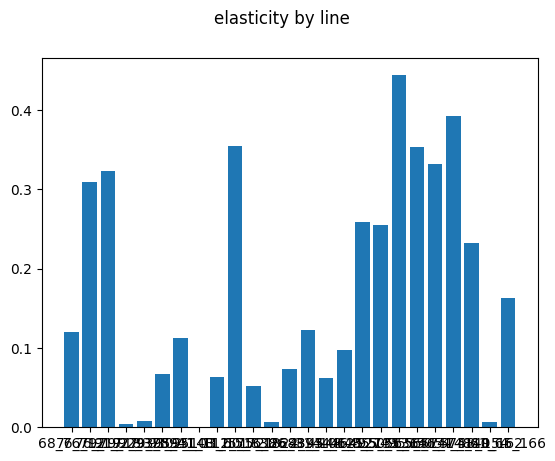

In [ ]:
ist = pd.Series(index=LINE_NAMES, data=thermal_limits)
ist = ist.loc[elasticity.index]

i_best = i_best.loc[:, elasticity.index]

mask = (i_best > ist.loc[elasticity.index].transpose())


elasticity["delta_E_init"] = ((i_do_nothing - ist.transpose()) * mask).sum(axis=0)
elasticity["delta_t_init"] = np.count_nonzero(mask.values, axis=0)
# plutot quantile
elasticity["maxDepth_q99"] = np.amax(i_do_nothing, axis=0) / ist

# Methode choisie : on cherche de gros maxDepths couplé à de petites élasticité, donc on part sur un classement des maxDepths/elasticity

elasticity["ranking"] = elasticity["maxDepth_q99"] / (elasticity["elasticity"] + 1.2) # for numerical stability : no elasticity implies a ranking of MaxDepth * 1e2
# correct IST to lower MaxDepth to 1.2 if no elasticity

# elasticity["correction"] = (1 + elasticity["maxDepth_init"]) / (1 + .2 + elasticity["elasticity"])
# elasticity["correction"].clip(lower=1, inplace=True)
# Si elasticity < 0.1:
#    Ist tq Max Depths < 0.3
# Sinon
#    Ist tq Max Depth < 0.5

elasticity["correction"] = 1
elasticity.loc["45_46_127", "correction"] = 1.3 # 1.5 trop haut
elasticity.loc[["76_79_17", "76_79_18"], "correction"] = 1.4
elasticity.loc[["43_44_125", "68_76_12"], "correction"] = 1.2
elasticity.loc[["92_93_39", "55_57_148"], "correction"] = 1.1
elasticity.loc[["21_22_93", "26_31_106", "79_95_41", "93_95_43"], "correction"] = 1.05

print(elasticity.head())

elasticity.dropna(inplace=True)
elasticity.to_excel(os.path.join(output_folder_v_evaluation, "elasticity.xlsx"))

matplt.figure()
matplt.suptitle("elasticity by line")
matplt.bar(elasticity.index, elasticity.elasticity)
matplt.show()



In [ ]:
recalibrate_th_limits=True
if recalibrate_th_limits:
    ist = pd.DataFrame(index=["recalibrated"], columns=LINE_NAMES, data=thermal_limits.reshape(1, -1))

    for line in elasticity.index:
        ist[line] = (ist[line] * elasticity.loc[line, "correction"]).round()
    ist.to_csv(os.path.join(input_folder_v_calibration, "new_thermal_limits.csv"))

## Analysis for evaluation

Average frequency of overload over tiemsteps and lines

average percentage each line is overloaded over time
0.6350156285736068


68_76_12  76_79_17  76_79_18  91_92_37  92_93_39  79_95_41  93_95_43  \
0  0.046505  0.031257  0.030114  0.927041  0.220325  0.496303  0.630289   

   102_103_60  31_112_75  11_15_83  15_16_86  17_18_88  21_22_93  26_31_106  \
0    0.995273   0.957917  0.968019  0.954105  0.983838  0.417397   0.390524   

   43_44_125  45_46_127  48_49_135  48_50_136  55_56_146  49_56_147  \
0     0.0709   0.007243   0.901311   0.976214   0.950484   0.920752   

   55_57_148  50_57_149  54_58_154  4_10_162  61_65_166  
0   0.275978   0.946291   0.848327  0.969734   0.959251

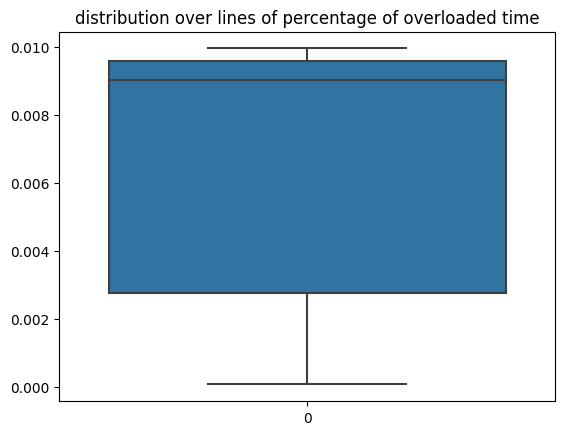

In [ ]:
print("average percentage each line is overloaded over time")
overall_mean_overloaded_time_percentage_per_line=df_overload.drop(["month","hour_of_day","day_of_week"],axis=1).mean().mean()*100
print(overall_mean_overloaded_time_percentage_per_line)

sns.boxplot(df_overload.drop(["month","hour_of_day","day_of_week"],axis=1).mean()).set_title("distribution over lines of percentage of overloaded time")

df_percentageOverload_lines=pd.DataFrame(df_overload.drop(["month","hour_of_day","day_of_week"],axis=1).mean()*100).transpose()
df_percentageOverload_lines

Text(0, 0.5, 'percentage of time line is overloaded')

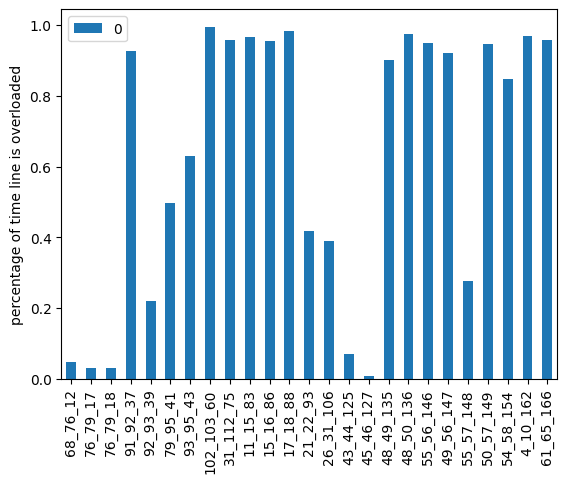

In [ ]:
#sns.set(rc={'figure.figsize':(12,8)})
#sns.heatmap(df_percentageOverload_lines)
bar_plot=df_percentageOverload_lines.transpose().plot(kind='bar')
bar_plot.set_ylabel('percentage of time line is overloaded')

# print(df_percentageOverload_lines.index)
# print(df_percentageOverload_lines.columns)
# print(df_percentageOverload_lines)
# mean = np.mean(df_percentageOverload_lines.values)
# print(f"mean : {mean}")
# std = np.std(df_percentageOverload_lines.values)
# print(f"std : {std}")
# df_percentageOverload_lines_new = (df_percentageOverload_lines - mean) * .5/std + 1

# bar_plot=df_percentageOverload_lines_new.transpose().plot(kind='bar')
# bar_plot.set_ylabel('percentage of time line is overloaded')

#### For all overloads

In [ ]:
threshold_high_occurence_ov=threshold_high_weekly_occurence*nb_scenarios
print(threshold_high_occurence_ov)
threshold_low_occurence_ov=threshold_low_weekly_occurence*nb_scenarios
threshold_low_occurence_ov

390.0


130.0

bar plot for lines with intresting overloads dn_agent


Text(0, 0.5, 'nb overloads over all scenarios')

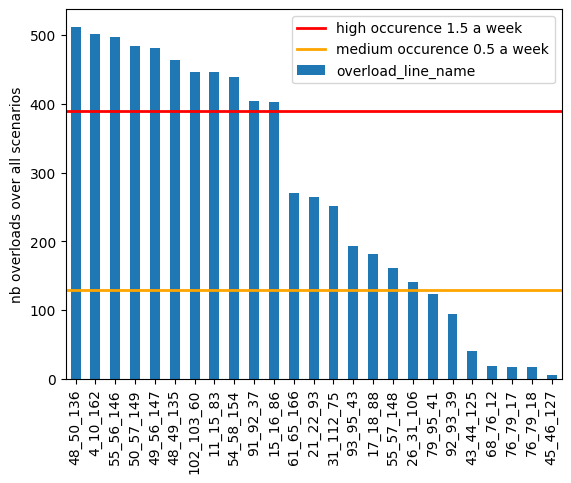

In [ ]:
overloads_lines_occurence_dn=overloads_info[overloads_info.agent=="do_nothing"].overload_line_name.value_counts()

print('bar plot for lines with intresting overloads dn_agent')
bar_plot=pd.Series(overloads_lines_occurence_dn).plot(kind='bar')#iplot(kind='bar')

bar_plot.axhline(y=threshold_high_occurence_ov, color= 'red', linewidth=2,label="high occurence "+str(threshold_high_weekly_occurence)+" a week")
bar_plot.axhline(y=threshold_low_occurence_ov, color= 'orange', linewidth=2,label="medium occurence "+str(threshold_low_weekly_occurence)+" a week")
bar_plot.legend()
bar_plot.set_ylabel('nb overloads over all scenarios')

bar plot for lines with interesting overloads best agent


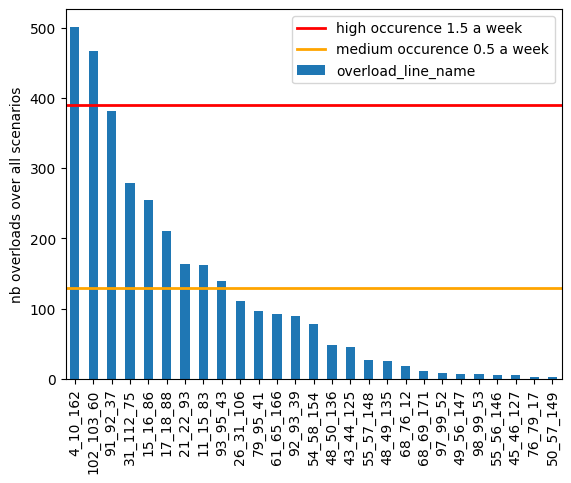

In [ ]:
if not only_do_nothing_agent:
    overloads_lines_occurence_best=overloads_info[overloads_info.agent=="best_agent"].overload_line_name.value_counts()

    print('bar plot for lines with interesting overloads best agent')
    bar_plot=pd.Series(overloads_lines_occurence_best).plot(kind='bar')#iplot(kind='bar')
    bar_plot.axhline(y=threshold_high_occurence_ov, color= 'red', linewidth=2,label="high occurence "+str(threshold_high_weekly_occurence)+" a week")
    bar_plot.axhline(y=threshold_low_occurence_ov, color= 'orange', linewidth=2,label="medium occurence "+str(threshold_low_weekly_occurence)+" a week")
    bar_plot.legend()
    bar_plot.set_ylabel('nb overloads over all scenarios')

In [ ]:
from utils.generate_visus import plot_grid_overload_frequency

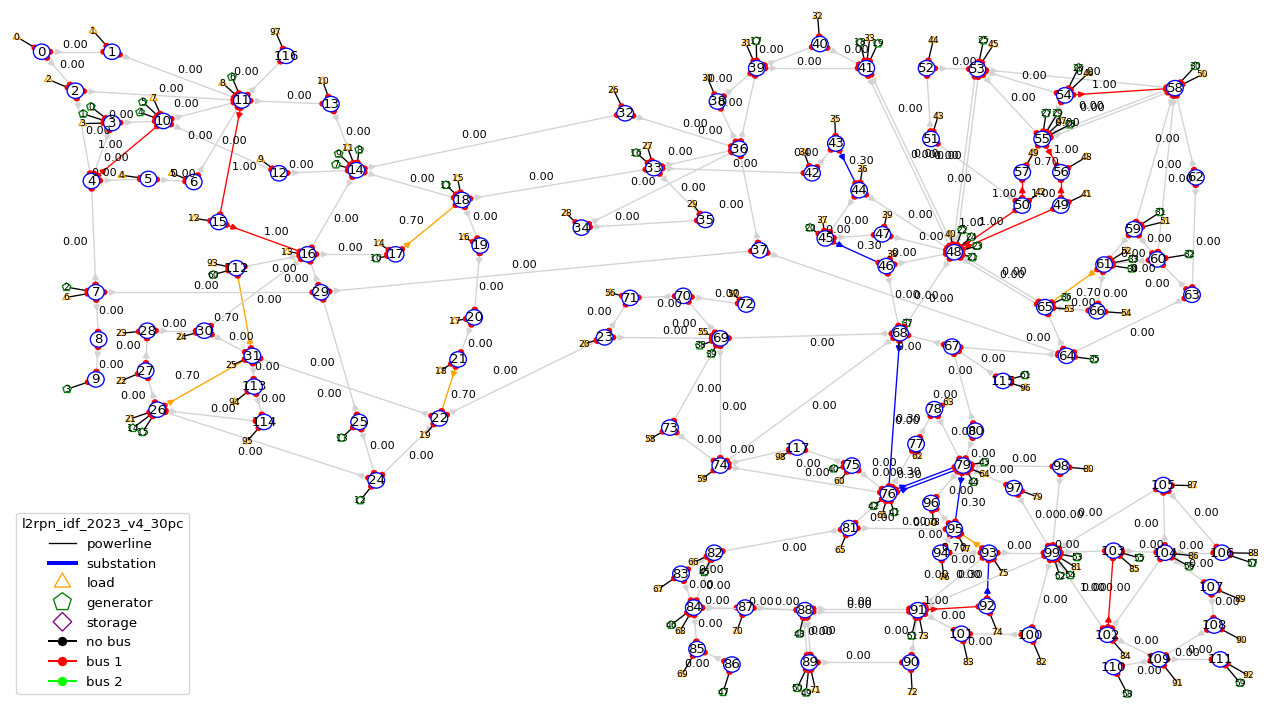

In [ ]:
plot_grid_overload_frequency(env_ref,overloads_lines_occurence_dn,
                             threshold_high_occurence_ov,threshold_low_occurence_ov)

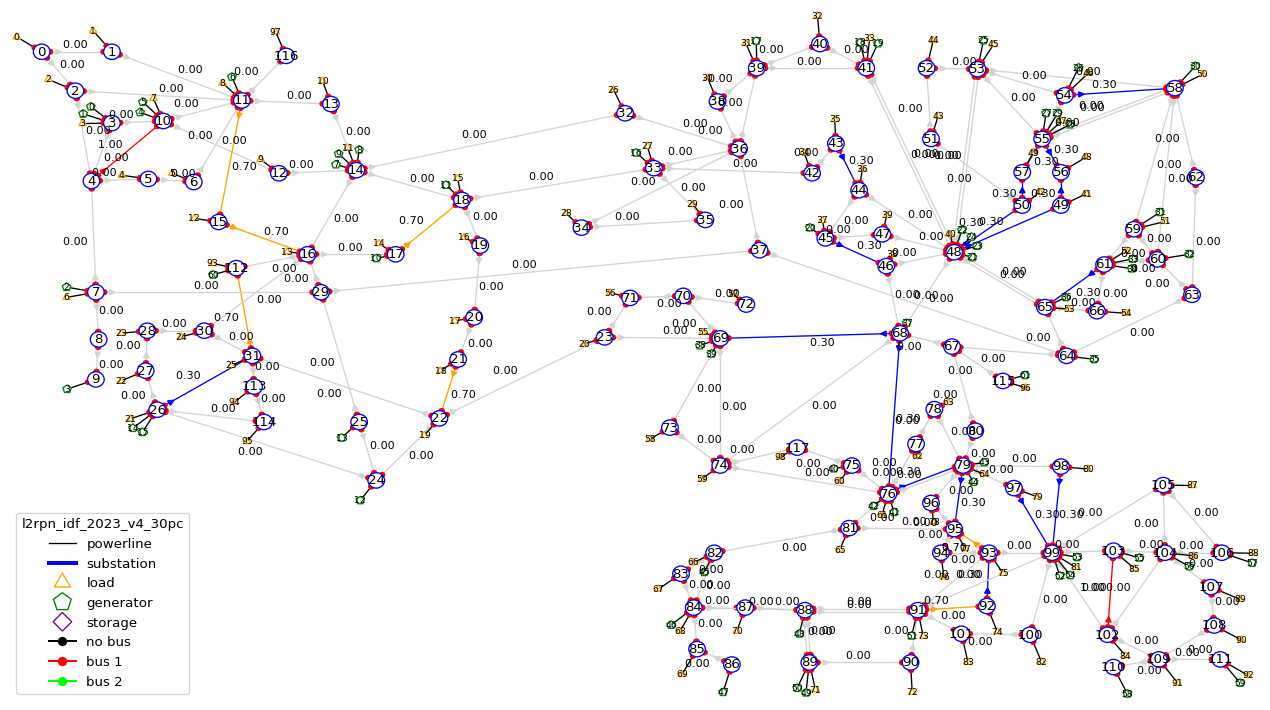

In [ ]:
plot_grid_overload_frequency(env_ref,overloads_lines_occurence_best,
                             threshold_high_occurence_ov,threshold_low_occurence_ov)

In [ ]:
# for calling interactive pandas iplot. But not that useful when not looking for tiny details
#cf.go_offline()
#cf.set_config_file(offline=False, world_readable=True)

### Plot overload depth moustache plot for each line

#### Depth

Text(0.5, 1.0, 'max depths with do nothing agent')

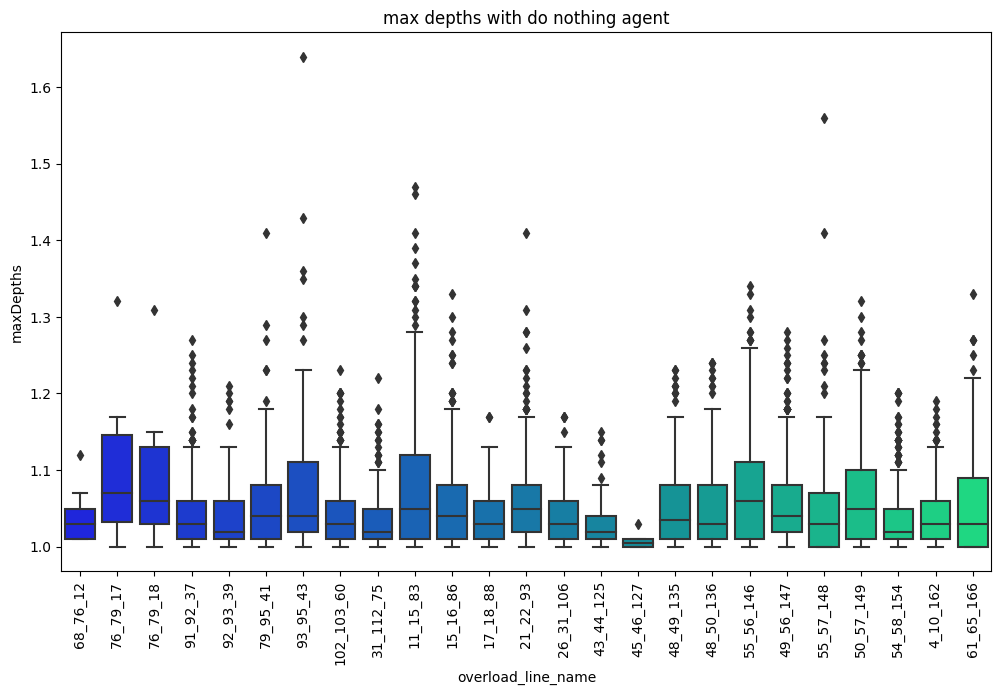

In [ ]:

matplt.figure(figsize=(12, 7))
matplt.xticks(rotation=90)

sns.boxplot(x='overload_line_name', y='maxDepths', data=overloads_info[overloads_info.agent=="do_nothing"], 
            palette='winter').set_title("max depths with do nothing agent")

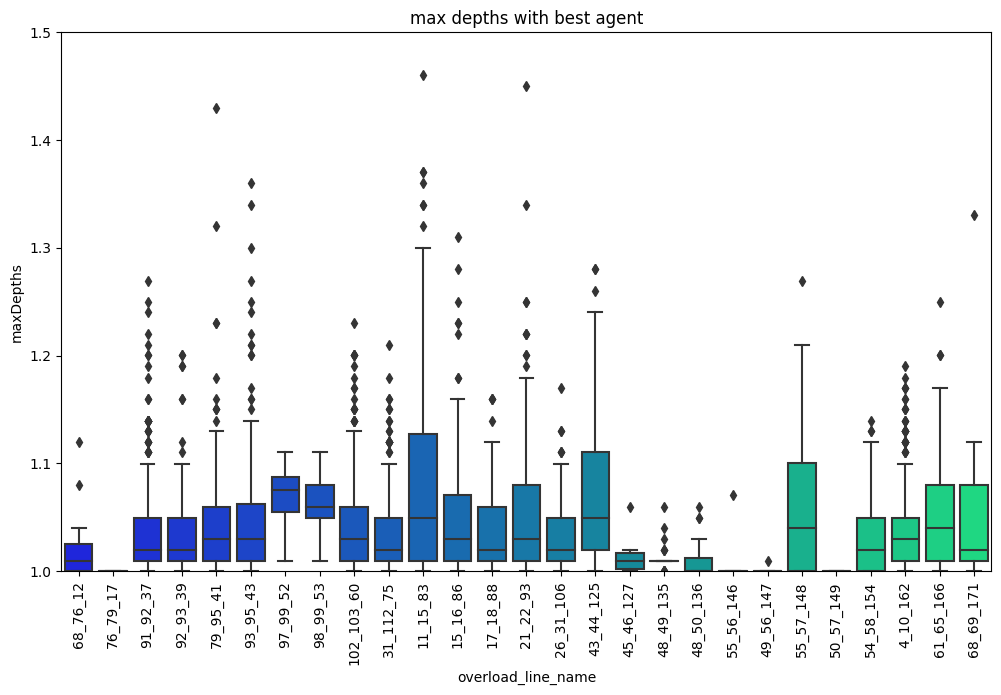

In [ ]:
if not only_do_nothing_agent:
    matplt.figure(figsize=(12, 7))
    matplt.xticks(rotation=90)
    
    matplt.ylim(1, 1.5)
    sns.boxplot(x='overload_line_name', y='maxDepths', data=overloads_info[overloads_info.agent=="best_agent"], 
                palette='winter').set_title("max depths with best agent")

#### Duration

Text(0.5, 1.0, 'overload duration with do nothing agent')

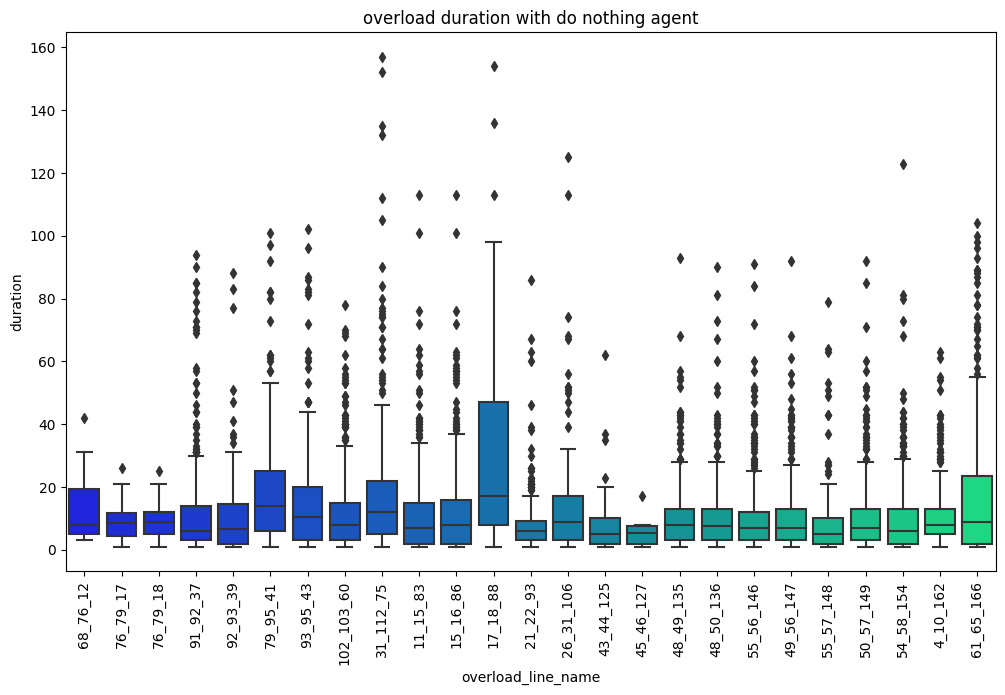

In [ ]:

matplt.figure(figsize=(12, 7))
matplt.xticks(rotation=90)
sns.boxplot(x='overload_line_name', y='duration', data=overloads_info[overloads_info.agent=="do_nothing"], 
            palette='winter').set_title("overload duration with do nothing agent")

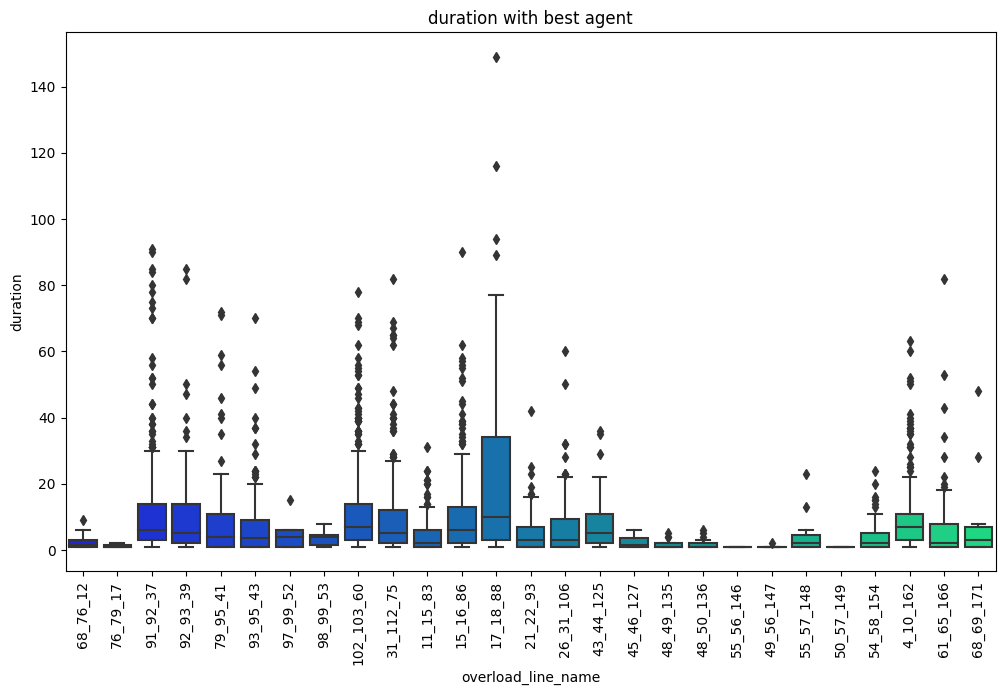

In [ ]:
if not only_do_nothing_agent:
    matplt.figure(figsize=(12, 7))
    matplt.xticks(rotation=90)
    
    sns.boxplot(x='overload_line_name', y='duration', data=overloads_info[overloads_info.agent=="best_agent"], 
                palette='winter').set_title("duration with best agent")

### Density plot of overload depth vs duration

Text(37.597222222222214, 0.5, 'Rho max')

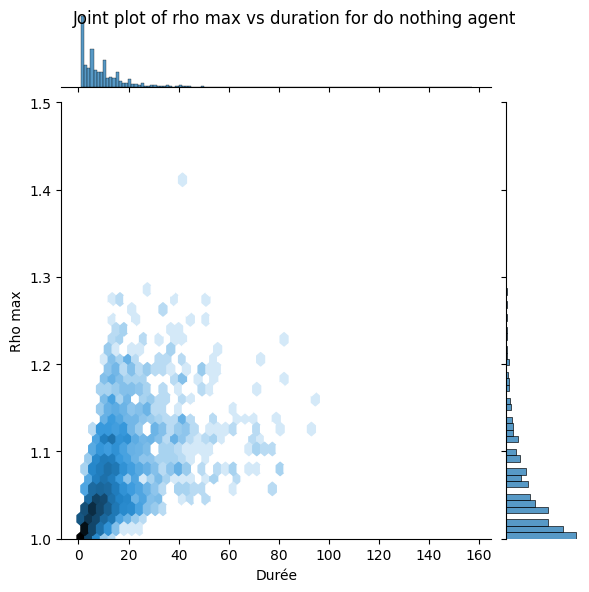

In [ ]:

sns.jointplot(x=overloads_info[overloads_info.agent=="do_nothing"].duration,
                      y=overloads_info[overloads_info.agent=="do_nothing"].maxDepths.astype('float32'),  ylim=(1.0, 1.5),
                      kind="hex", bins="log", hue_norm="log")
matplt.suptitle(f"Joint plot of rho max vs duration for do nothing agent")
matplt.xlabel('Durée')
matplt.ylabel('Rho max')

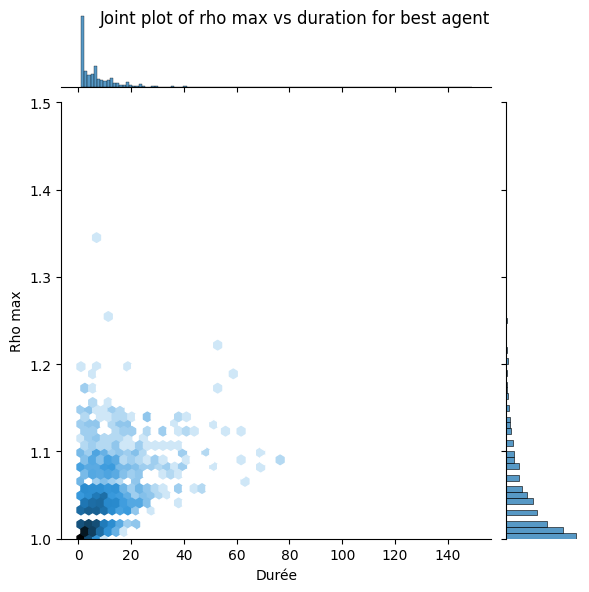

In [ ]:
if not only_do_nothing_agent:
    sns.jointplot(x=overloads_info[overloads_info.agent=="best_agent"][overloads_info.maxDepths<=1.5].duration,
                          y=overloads_info[overloads_info.agent=="best_agent"].maxDepths.astype('float32'),  ylim=(1.0, 1.5),
                          kind="hex", bins="log", hue_norm="log")
    matplt.suptitle(f"Joint plot of rho max vs duration for best agent")
    matplt.xlabel('Durée')
    matplt.ylabel('Rho max')

### Look at overload per month - day of week - hour

In [ ]:
#table_agent_scenario = pd.pivot_table(overloads_info, values='duration', index=['scenarios'],
#
#                    columns=['agent'], aggfunc=np.count_nonzero,fill_value=0)
#
#table_agent_scenario.iplot(kind="heatmap")

<Axes: ylabel='month'>

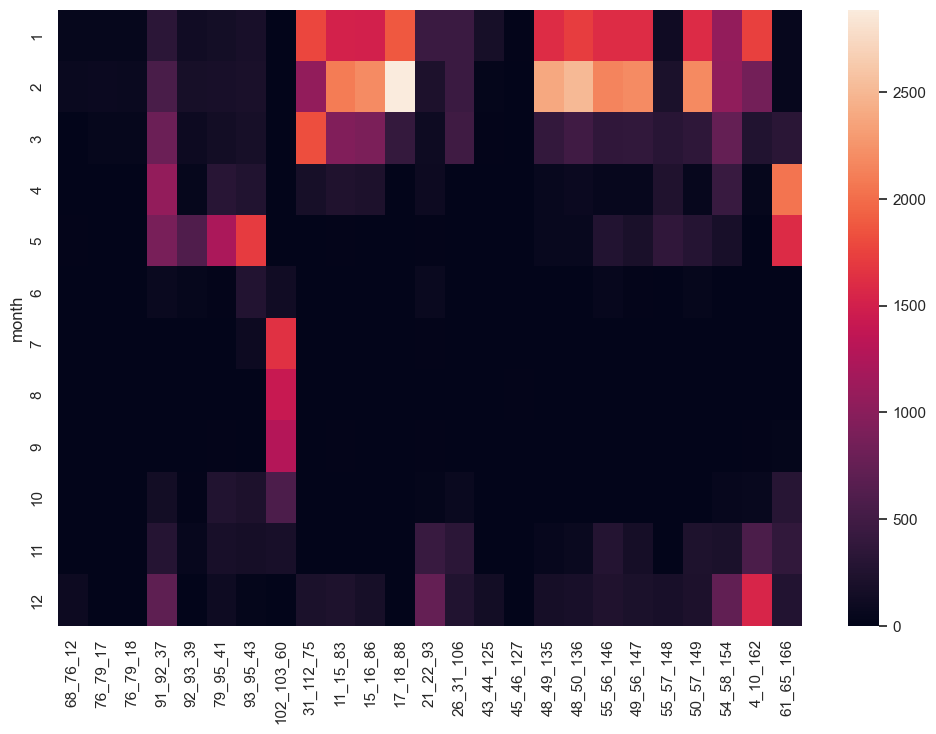

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(df_overload.drop(["hour_of_day","day_of_week"],axis=1).groupby('month').sum())

<Axes: ylabel='day_of_week'>

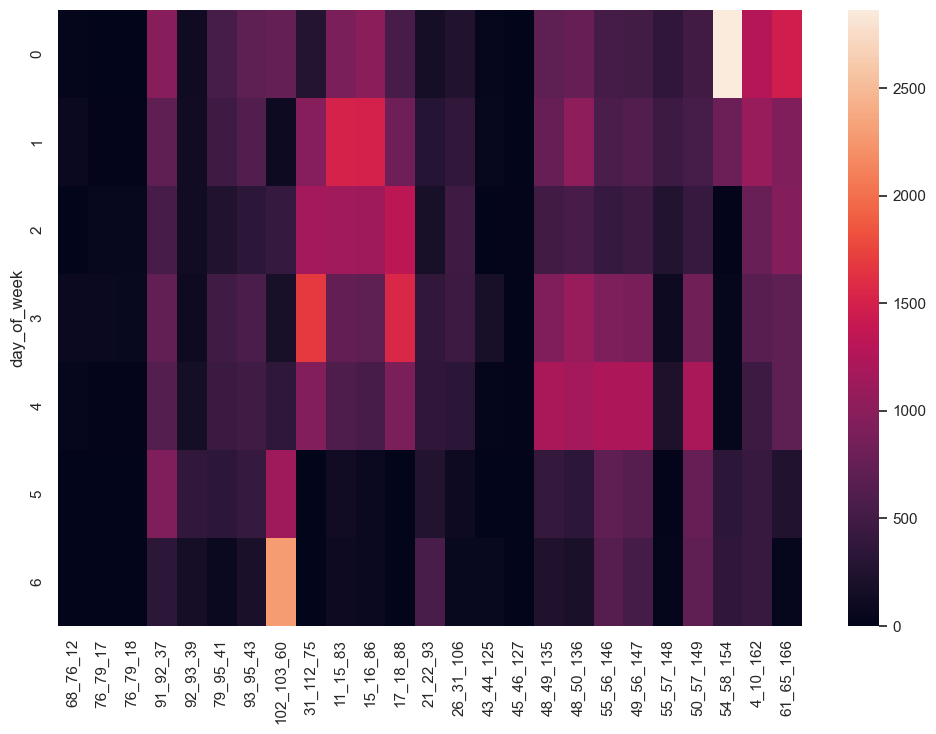

In [ ]:


sns.heatmap(df_overload.drop(["hour_of_day","month"],axis=1).groupby('day_of_week').sum())

<Axes: ylabel='hour_of_day'>

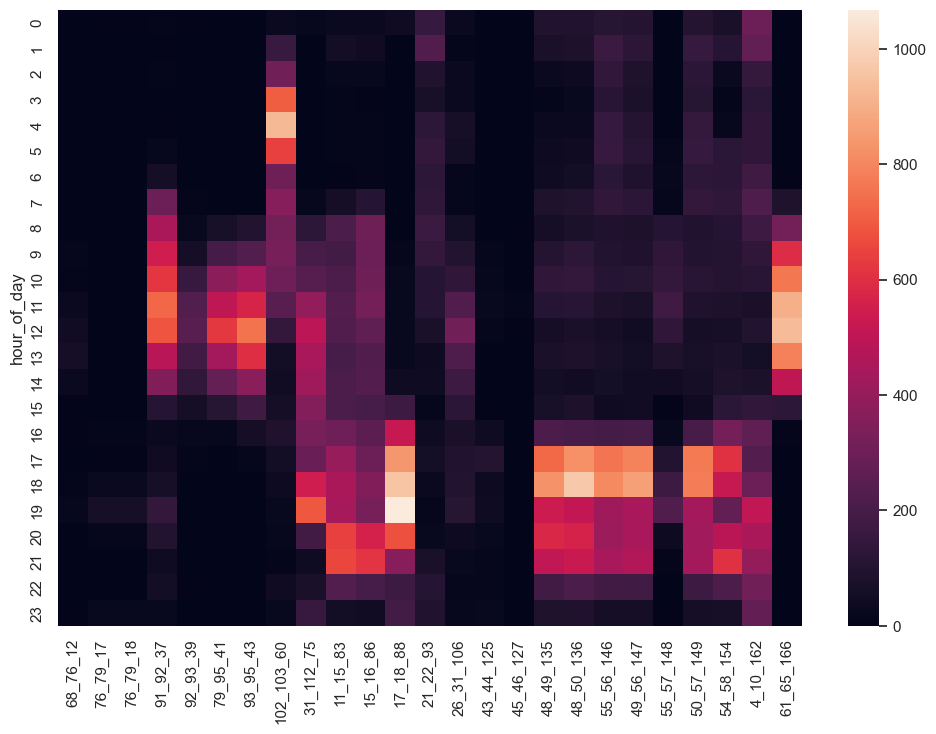

In [ ]:
sns.heatmap(df_overload.drop(["month","day_of_week"],axis=1).groupby('hour_of_day').sum())

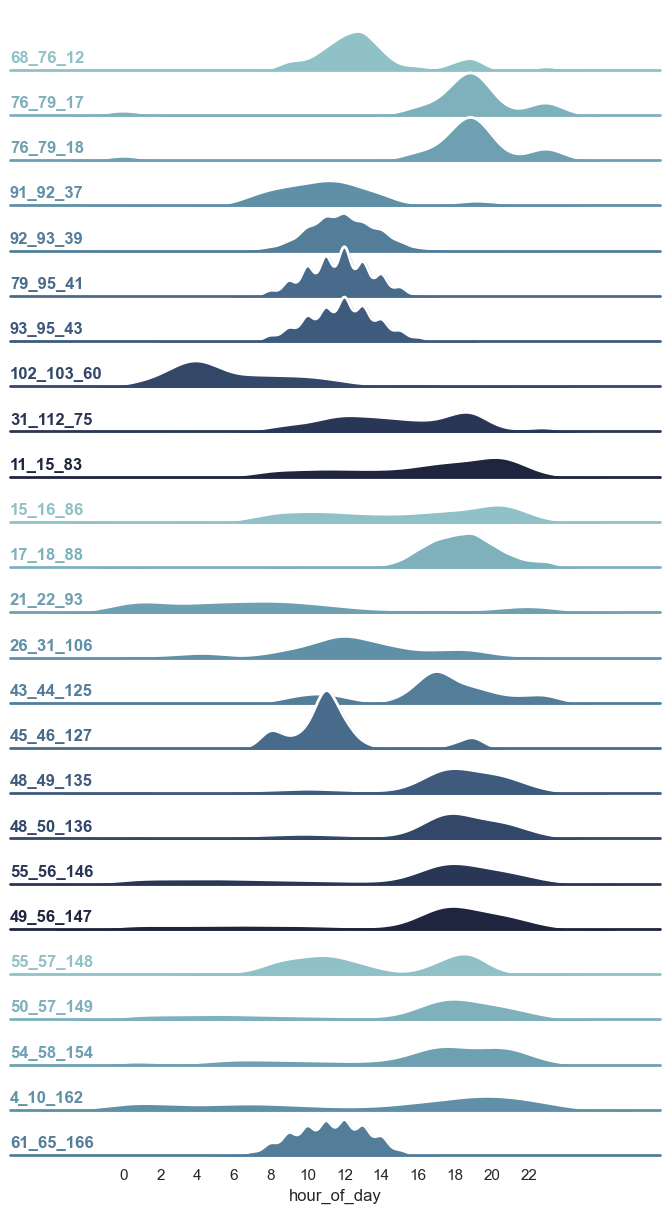

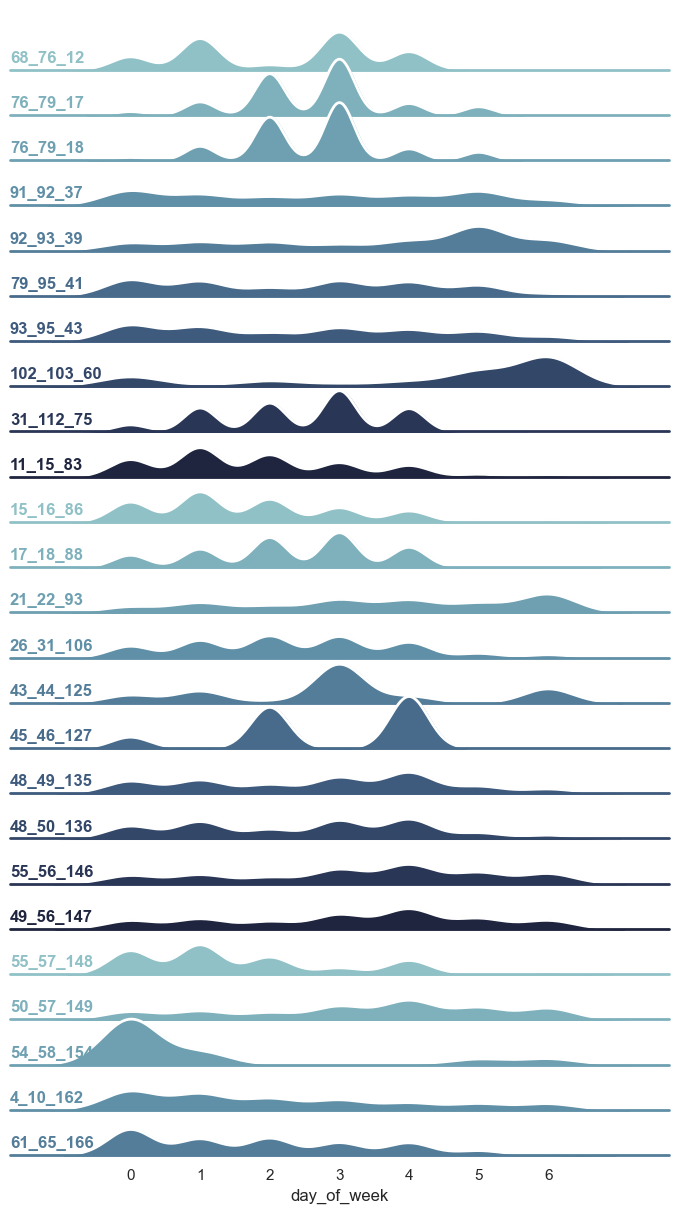

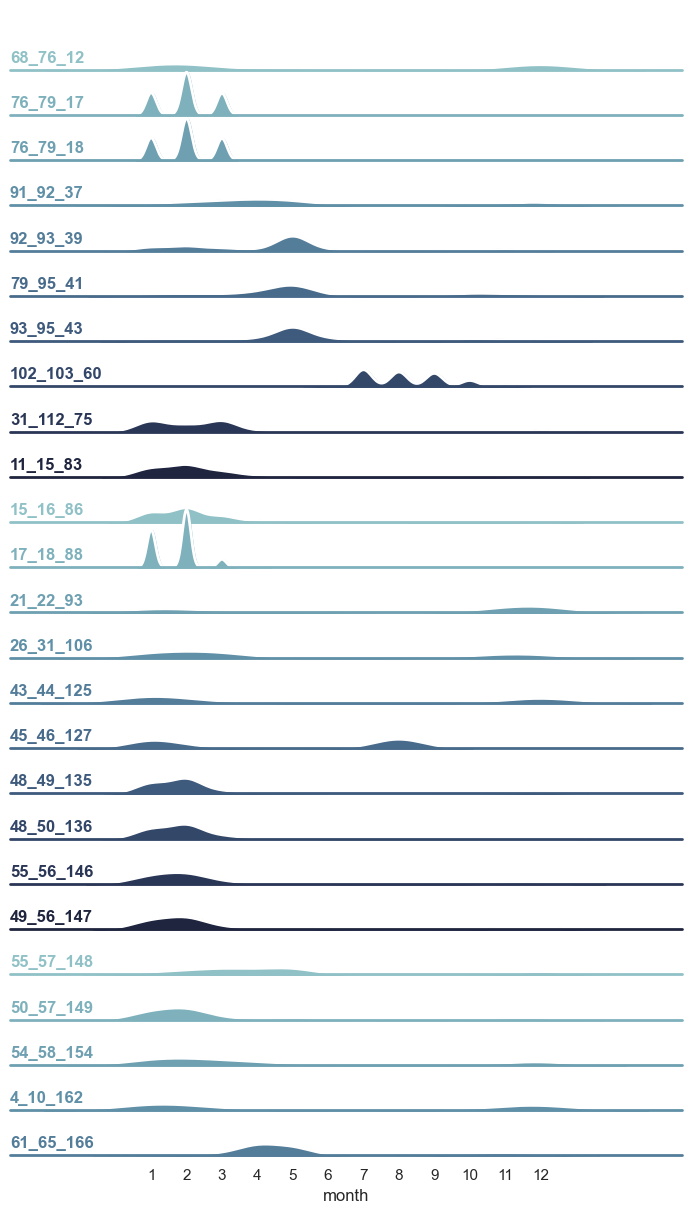

In [ ]:
from utils.generate_visus import plot_month_day_hour_dist

plot_month_day_hour_dist(df_istratio, factors=lines_overload)


### Plots of occurence of interesting overload by lines

In [ ]:
matplt.rcParams.update(matplt.rcParamsDefault)
%matplotlib inline

#### For interesting overloads

In [ ]:
print(threshold_interesting_overload_duration)


10


bar plot for lines with intresting overloads for do nothing agent


Text(0, 0.5, 'nb overloads over all scenarios')

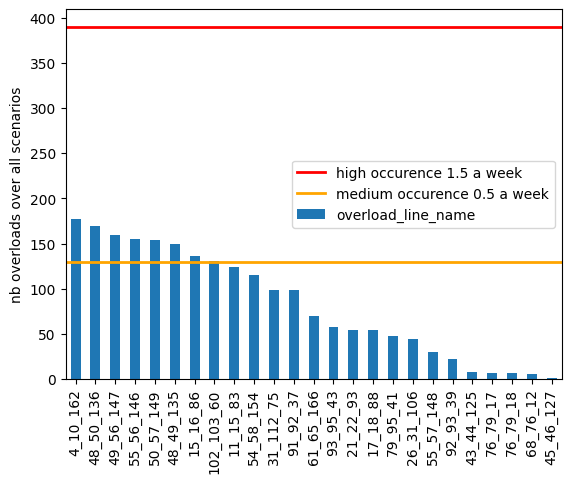

In [ ]:

idxInteresting=((overloads_info[overloads_info.agent=="do_nothing"].duration>=threshold_interesting_overload_duration )
                    & (overloads_info[overloads_info.agent=="do_nothing"].duration<threshold_hard_overload_duration))

interesting_overloads_lines_occurence_dn=overloads_info[overloads_info.agent=="do_nothing"].overload_line_name[idxInteresting].value_counts() 

print('bar plot for lines with intresting overloads for do nothing agent')
bar_plot=pd.Series(interesting_overloads_lines_occurence_dn).plot(kind='bar')#iplot(kind='bar')
bar_plot.axhline(y=threshold_high_occurence_ov, color= 'red', linewidth=2,label="high occurence "+str(threshold_high_weekly_occurence)+" a week")
bar_plot.axhline(y=threshold_low_occurence_ov, color= 'orange', linewidth=2,label="medium occurence "+str(threshold_low_weekly_occurence)+" a week")
bar_plot.legend()
bar_plot.set_ylabel('nb overloads over all scenarios')

bar plot for lines with intresting overloads for best agent


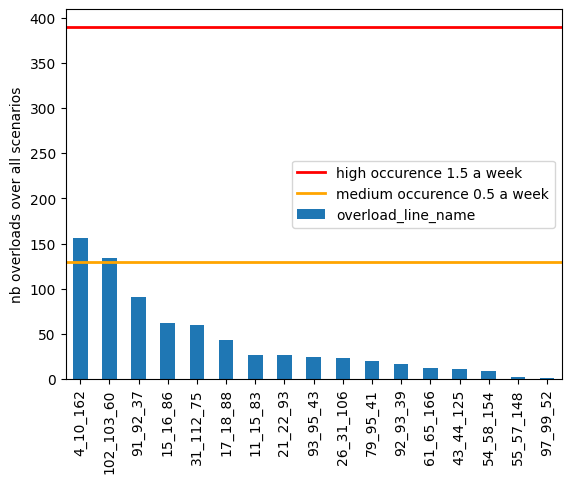

In [ ]:
if not only_do_nothing_agent:
    idxInteresting=((overloads_info[overloads_info.agent=="best_agent"].duration>=threshold_interesting_overload_duration )
                        & (overloads_info[overloads_info.agent=="best_agent"].duration<threshold_hard_overload_duration))

    interesting_overloads_lines_occurence_best=overloads_info[overloads_info.agent=="best_agent"].overload_line_name[idxInteresting].value_counts() 

    print('bar plot for lines with intresting overloads for best agent')
    bar_plot=pd.Series(interesting_overloads_lines_occurence_best).plot(kind='bar')#iplot(kind='bar')
    bar_plot.axhline(y=threshold_high_occurence_ov, color= 'red', linewidth=2,label="high occurence "+str(threshold_high_weekly_occurence)+" a week")
    bar_plot.axhline(y=threshold_low_occurence_ov, color= 'orange', linewidth=2,label="medium occurence "+str(threshold_low_weekly_occurence)+" a week")
    bar_plot.legend()
    bar_plot.set_ylabel('nb overloads over all scenarios')

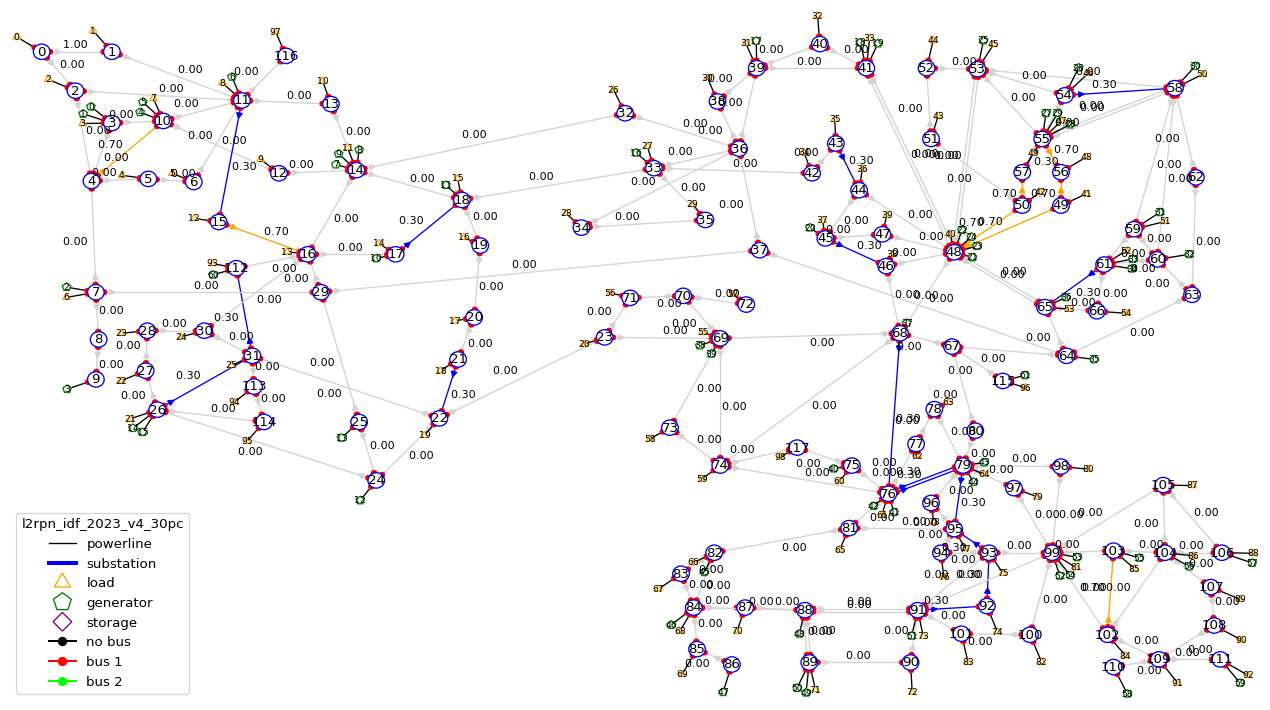

In [ ]:
plot_grid_overload_frequency(env_ref,interesting_overloads_lines_occurence_dn,
                             threshold_high_occurence_ov,threshold_low_occurence_ov)

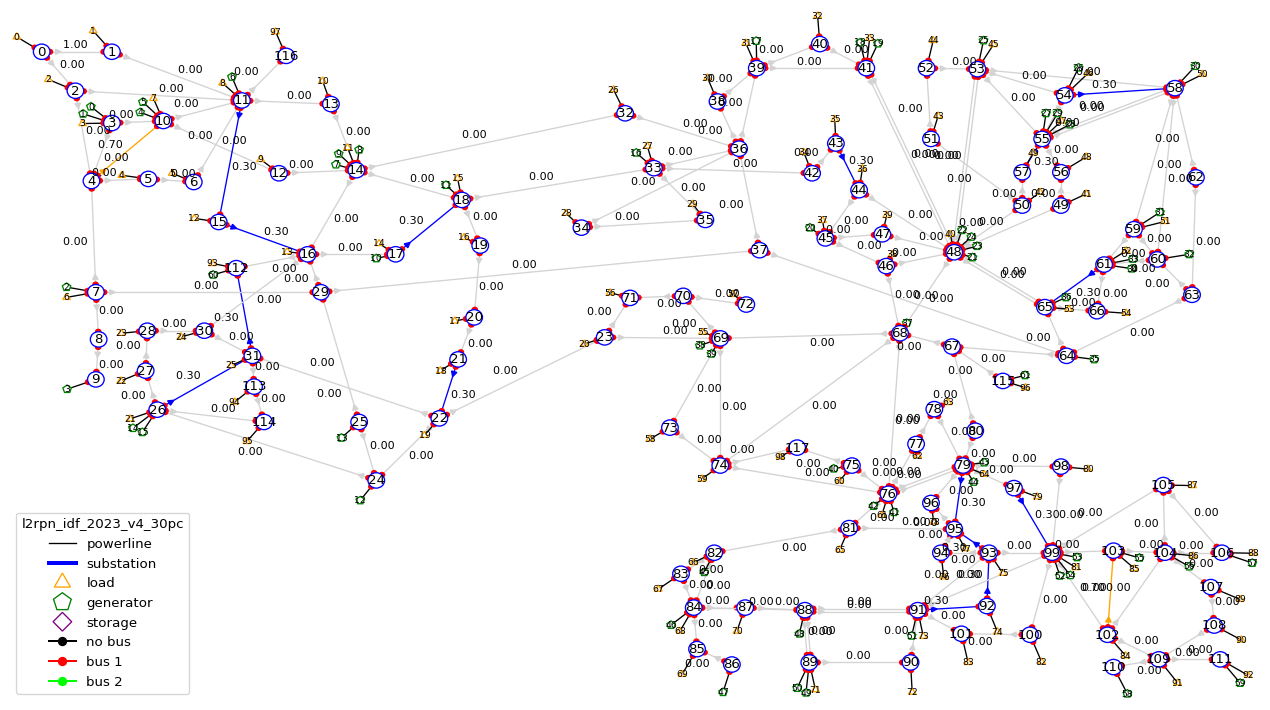

In [ ]:
if not only_do_nothing_agent:
    plot_grid_overload_frequency(env_ref,interesting_overloads_lines_occurence_best,
                             threshold_high_occurence_ov,threshold_low_occurence_ov)

#### For hard overloads

In [ ]:
print(threshold_hard_overload_duration)

25


bar plot for lines with hard overloads for do nothing agent


Text(0, 0.5, 'nb overloads over all scenarios')

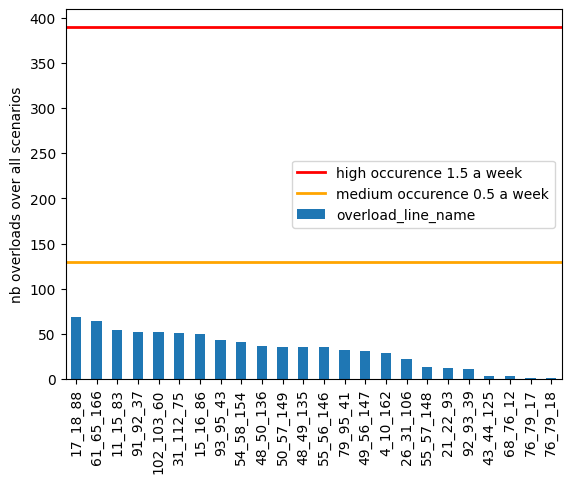

In [ ]:

idxHard=(overloads_info[overloads_info.agent=="do_nothing"].duration>=threshold_hard_overload_duration)

hard_overloads_lines_occurence_dn=overloads_info[overloads_info.agent=="do_nothing"].overload_line_name[idxHard].value_counts() 

print('bar plot for lines with hard overloads for do nothing agent')
bar_plot=pd.Series(hard_overloads_lines_occurence_dn).plot(kind='bar')#iplot(kind='bar')
bar_plot.axhline(y=threshold_high_occurence_ov, color= 'red', linewidth=2,label="high occurence "+str(threshold_high_weekly_occurence)+" a week")
bar_plot.axhline(y=threshold_low_occurence_ov, color= 'orange', linewidth=2,label="medium occurence "+str(threshold_low_weekly_occurence)+" a week")
bar_plot.legend()
bar_plot.set_ylabel('nb overloads over all scenarios')

bar plot for lines with hard overloads for best agent


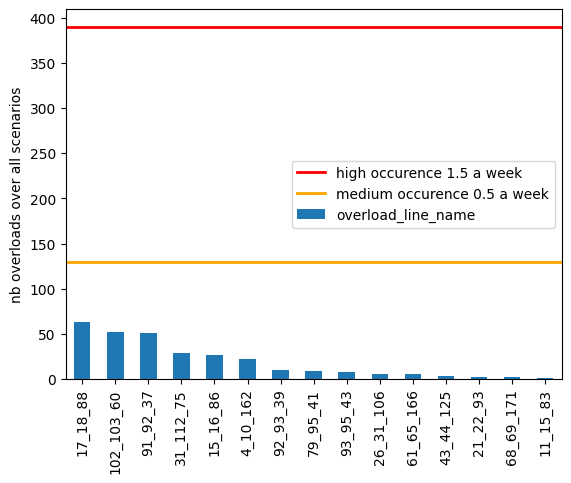

In [ ]:
if not only_do_nothing_agent:
    idxHard=(overloads_info[overloads_info.agent=="best_agent"].duration>=threshold_hard_overload_duration)

    hard_overloads_lines_occurence_best=overloads_info[overloads_info.agent=="best_agent"].overload_line_name[idxHard].value_counts() 

    print('bar plot for lines with hard overloads for best agent')
    bar_plot=pd.Series(hard_overloads_lines_occurence_best).plot(kind='bar')#iplot(kind='bar')
    bar_plot.axhline(y=threshold_high_occurence_ov, color= 'red', linewidth=2,label="high occurence "+str(threshold_high_weekly_occurence)+" a week")
    bar_plot.axhline(y=threshold_low_occurence_ov, color= 'orange', linewidth=2,label="medium occurence "+str(threshold_low_weekly_occurence)+" a week")
    bar_plot.legend()
    bar_plot.set_ylabel('nb overloads over all scenarios')

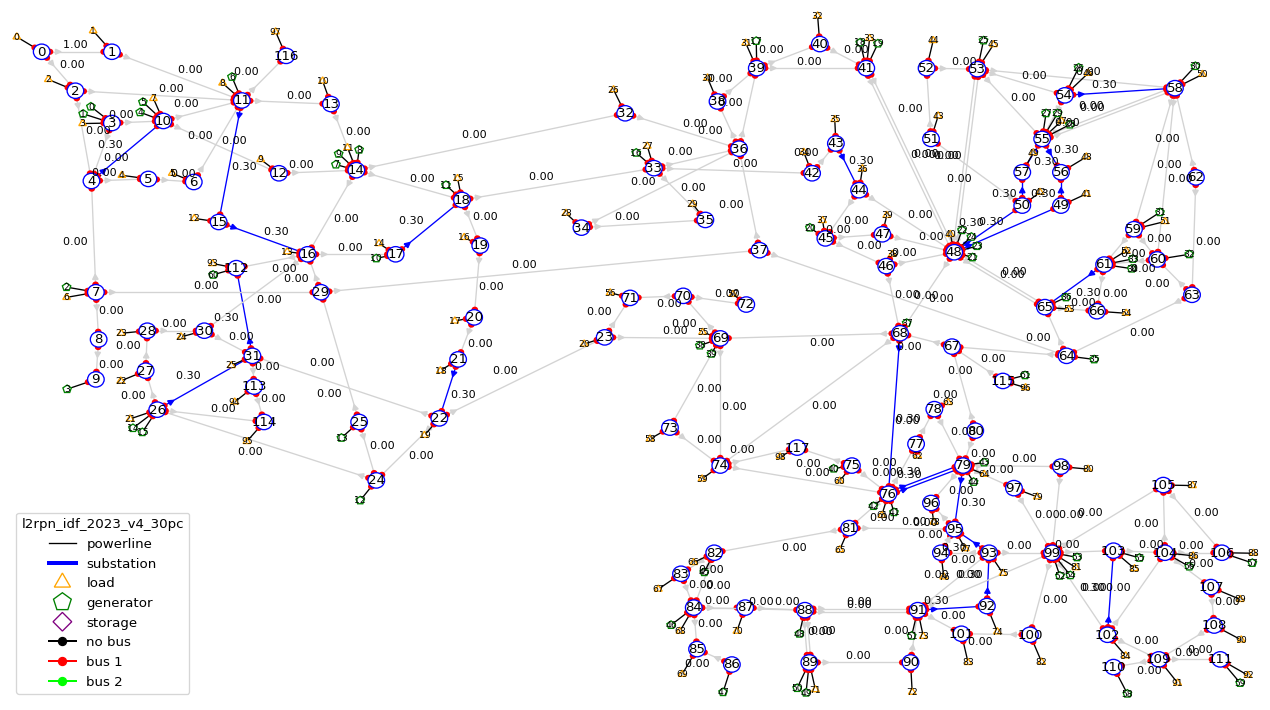

In [ ]:
plot_grid_overload_frequency(env_ref,hard_overloads_lines_occurence_dn,threshold_high_occurence_ov,
                             threshold_low_occurence_ov)

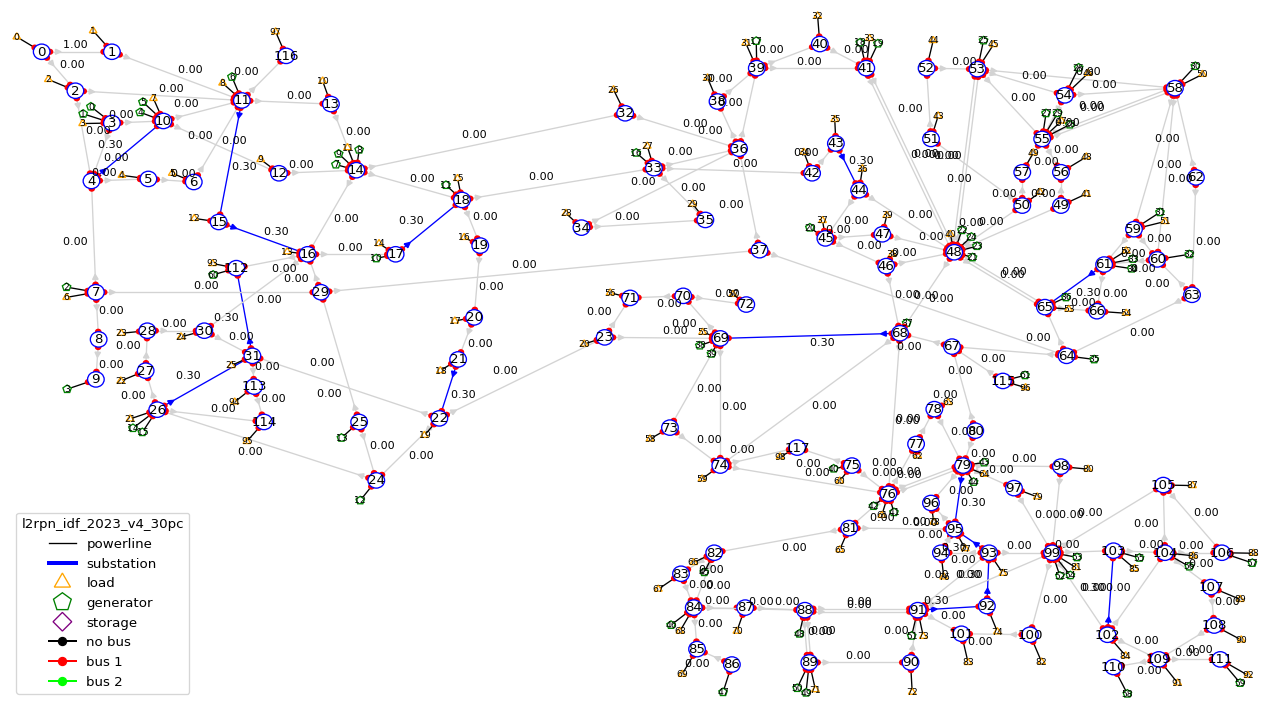

In [ ]:
if not only_do_nothing_agent:
    plot_grid_overload_frequency(env_ref,hard_overloads_lines_occurence_best,threshold_high_occurence_ov,
                             threshold_low_occurence_ov)

### Summary dataframe of worst overload for given agent and scenario

In [ ]:
#create a summary dataframe of worse overload in terms of duration for given agent and scenario
from IPython.display import display
from utils.Overload import MakeSummaryOverload_Scenario 
def plot_overload_summary_scenario(scenario,agent):
    #Scenario=Scenario_choose.value#"Scenario_december_08"
    #print(agent)
    possiblyOverloadedLines=(overloads_info.overload_line_name).unique()
    #print("possiblyOverloadedLines")
    #print(possiblyOverloadedLines)


    summary_overloads_scenario_df=MakeSummaryOverload_Scenario(scenario,agent,overloads_info,possiblyOverloadedLines)
    #print(summary_overloads_scenario_df.head(10))
    display(summary_overloads_scenario_df)
#summary_overloads_scenario_df

In [ ]:
overloads_info.head()

scenarios       agent  start_indices  end_indices  duration  \
0  2035-01-01_1  best_agent           1378         1387         9   
1  2035-01-08_3  best_agent            226          228         2   
2  2035-01-08_3  best_agent            394          397         3   
3  2035-02-12_0  best_agent            414          417         3   
4  2035-02-12_0  best_agent            430          436         6   

   maxDepth_indices  maxDepths  delta_E  meanDepths  hour_of_day  day_of_week  \
0              1383   1.040039     0.20    1.022222           19            4   
1               227   1.009766     0.01    1.005000           18            0   
2               395   1.080078     0.22    1.073333            8            1   
3               416   1.009766     0.02    1.006667           10            1   
4               434   1.120117     0.67    1.111667           12            1   

   month  day_of_year           datetimes overload_line_name  
0      1            5 2035-01-05 19:10:00           68_76_12  
1      1            8 2035-01-08 18:50:00           68_76_12  
2      1            9 2035-01-09 08:50:00           68_76_12  
3      2           44 2035-02-13 10:35:00           68_76_12  
4      2           44 2035-02-13 12:05:00           68_76_12

In [ ]:
if manual_scenario_viz:
    agent_names=overloads_info.agent.unique()

    Scenario_widget=widgets.Dropdown(
        options=overloads_info["scenarios"].unique().tolist(),
        value=overloads_info["scenarios"][0],
        description='Name:',
        disabled=False,
    )
    Agent_widget=widgets.Dropdown(
        options=agent_names,
        value=agent_names[0],
        description='Name:',
        disabled=False,
    )

    #summary_overloads_scenario_df=widgets.interactive(MakeSummaryOverload_Scenario,ScenarioName=Scenario_widget,agent=Agent_widget,
    #                                                  overloads_info=overloads_info,possiblyOverloadedLines=possiblyOverloadedLines)

    overload_scenario_view=widgets.interactive(plot_overload_summary_scenario, scenario=Scenario_widget,agent=Agent_widget)
    Scenario_widget.observe(lambda x: overload_scenario_view.update(), 'value')
    Agent_widget.observe(lambda x: overload_scenario_view.update(), 'value')
    overload_scenario_view

### Chronics plot in scenario around an overload of interest

In [ ]:
if manual_scenario_viz:
    Overload_id_widget=widgets.Dropdown(
        options=MakeSummaryOverload_Scenario(Scenario_widget.value,Agent_widget.value,overloads_info,lines_overload).index,
        value=0,
        description='Number:',
        disabled=False,
    )
#Overload_id_widget

In [ ]:
def plot_scenario_window(scenario,row_id_overload_in_df,agent):

    #row_id_overload_in_df=0
    time_window=72 #4heures

    #scenario=summary_overloads_scenario_df.scenarios[row_id_overload_in_df]
    #agent=summary_overloads_scenario_df.agent[row_id_overload_in_df]
    summary_overloads_scenario_df=MakeSummaryOverload_Scenario(scenario,agent,overloads_info,lines_overload)
    
    max_iter=df_analysis[(df_analysis.scenario==scenario)&(df_analysis.agent==agent)].shape[0]-1
    overload_duration=summary_overloads_scenario_df.duration[row_id_overload_in_df]
    t_start_overload=summary_overloads_scenario_df.start_indices[row_id_overload_in_df]
    start_id=max(0,t_start_overload-time_window/2)
    end_id=min(start_id+time_window,max_iter)
    
    max_D_indice=overloads_info.maxDepth_indices
    timesteps_overloads=list(max_D_indice[(overloads_info.scenarios==scenario)&(max_D_indice>=start_id) &(max_D_indice<=end_id) ])
    #####plot
    df_Scenario=df_analysis[['hydro','thermal','wind','solar','nuclear','load']][(df_analysis.scenario==scenario)&(df_analysis.agent==agent)].reset_index(drop=True)
    df_Scenario_time_window=df_Scenario[(df_Scenario.index>=start_id) & (df_Scenario.index<=end_id)]

    #print("visualizing overloads in scenario "+scenario+" for agent "+agent+" around timestep "+str(t_start_overload))
    title=scenario+" for agent "+agent+" around timestep "+str(t_start_overload)
    #display(df_Scenario_time_window.astype("float32").iplot(asFigure=True,title=title , vline=timesteps_overloads))
    display(df_Scenario_time_window.astype("float32").iplot(asFigure=True,title=title , vline=timesteps_overloads))

In [ ]:
if manual_scenario_viz:
    plot_scenario_window_view=widgets.interactive(plot_scenario_window, scenario=Scenario_widget, row_id_overload_in_df=Overload_id_widget,agent=Agent_widget)
    #Scenario_widget.observe(lambda x: plot_scenario_window_view.update(), 'value')
    Overload_id_widget.observe(lambda x: plot_scenario_window_view.update(), 'value')

    plot_scenario_window_view

# Best agent

average percentage each line is overloaded over time
0.22062830536566905


68_76_12  76_79_17  91_92_37  92_93_39  79_95_41  93_95_43  97_99_52  \
0  0.008577  0.000762  0.859381  0.186209  0.179919  0.210605  0.007243   

   98_99_53  102_103_60  31_112_75  11_15_83  15_16_86  17_18_88  21_22_93  \
0  0.004765    1.009758    0.52432    0.1479  0.503926  0.837082  0.158382   

   26_31_106  43_44_125  45_46_127  48_49_135  48_50_136  55_56_146  \
0   0.160479   0.071282   0.002859   0.007624   0.013913   0.001144   

   49_56_147  55_57_148  50_57_149  54_58_154  4_10_162  61_65_166  68_69_171  
0   0.001525   0.018487   0.000381   0.058512  0.838416   0.123694   0.019822

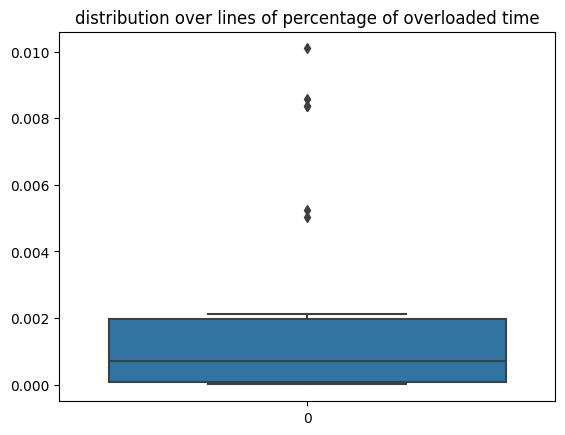

In [ ]:
df_best = df_analysis.loc[df_analysis.agent == 'best_agent']

lines_overload_best=overloads_info[overloads_info.agent=="best_agent"]["overload_line_name"].unique()
name_lines=list(env_ref.name_line)
ids_overload_best=[name_lines.index(l) for l in lines_overload_best]

df_istratio_best = df_best[lines_overload_best] / thermal_limits[ids_overload_best].reshape(1,-1) #env_ref._thermal_limit_a[ids_overload].reshape(1,-1) 
df_overload_best = 1.* (df_istratio_best >= 1)


df_istratio_best["month"]       = df_best["month"]
df_istratio_best["hour_of_day"] = df_best["hour_of_day"]
df_istratio_best["day_of_week"] = df_best["day_of_week"]

df_overload_best["month"]       = df_best["month"]
df_overload_best["hour_of_day"] = df_best["hour_of_day"]
df_overload_best["day_of_week"] = df_best["day_of_week"]

print("average percentage each line is overloaded over time")
overall_best_mean_overloaded_time_percentage_per_line=df_overload_best.drop(["month","hour_of_day","day_of_week"],axis=1).mean().mean()*100
print(overall_best_mean_overloaded_time_percentage_per_line)

sns.boxplot(df_overload_best.drop(["month","hour_of_day","day_of_week"],axis=1).mean()).set_title("distribution over lines of percentage of overloaded time")

df_best_percentageOverload_lines=pd.DataFrame(df_overload_best.drop(["month","hour_of_day","day_of_week"],axis=1).mean()*100).transpose()
df_best_percentageOverload_lines

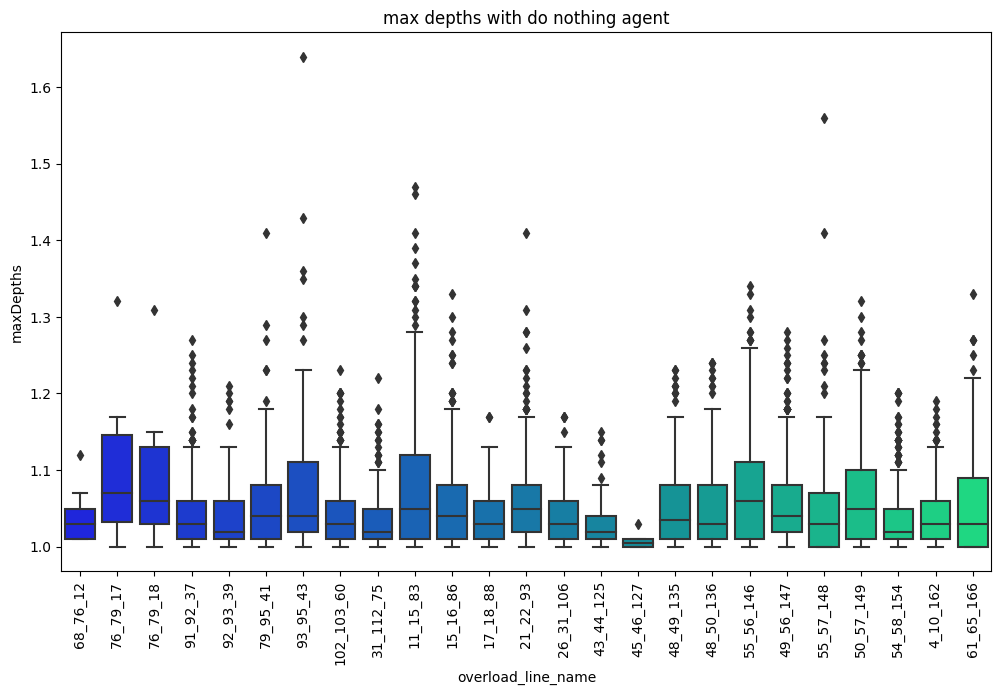

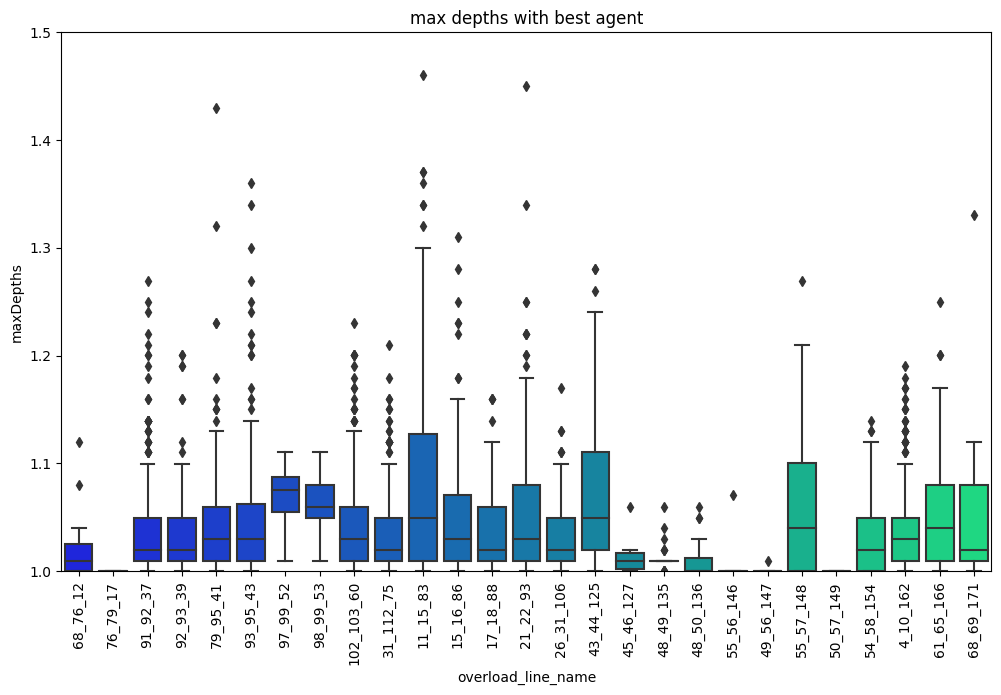

In [ ]:

matplt.figure(figsize=(12, 7))
matplt.xticks(rotation=90)

sns.boxplot(x='overload_line_name', y='maxDepths', data=overloads_info[overloads_info.agent=="do_nothing"], 
            palette='winter').set_title("max depths with do nothing agent")

if not only_do_nothing_agent:
    matplt.figure(figsize=(12, 7))
    matplt.xticks(rotation=90)
    
    matplt.ylim(1, 1.5)
    sns.boxplot(x='overload_line_name', y='maxDepths', data=overloads_info[overloads_info.agent=="best_agent"], 
                palette='winter').set_title("max depths with best agent")

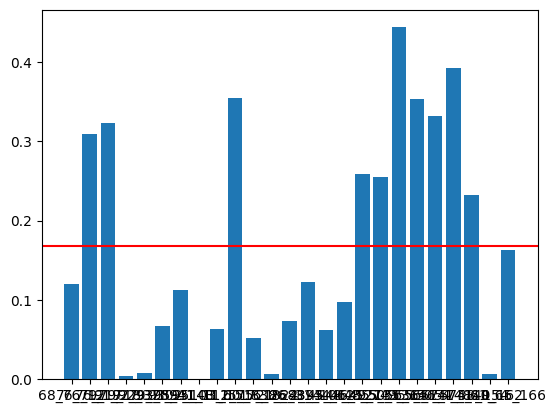

In [ ]:
matplt.figure()
matplt.bar(elasticity.index, elasticity.elasticity)
matplt.axhline(elasticity.elasticity.mean(), c='red')
matplt.show()